In [ ]:
                                Insurance Claim Fraud Detection
Project Description

Insurance fraud is a huge problem in the industry. 
It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. 
It also has the details of the accident on the basis of which the claims have been made. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
ICDF=pd.read_csv('Automobile_insurance_claim.csv',header=None)

In [4]:
ICDF

0   1       2           3   4         5     6        7        8   \
0    328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0   
1    228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000   
2    134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000   
3    256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000   
4    228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000   
..   ...  ..     ...         ...  ..       ...   ...      ...      ...   
995    3  38  941851  16-07-1991  OH  500/1000  1000  1310.80        0   
996  285  41  186934  05-01-2014  IL   100/300  1000  1436.79        0   
997  130  34  918516  17-02-2003  OH   250/500   500  1383.49  3000000   
998  458  62  533940  18-11-2011  IL  500/1000  2000  1356.92  5000000   
999  456  60  556080  11-11-1996  OH   250/500  1000   766.19        0   

         9   ... 29   30      31     32     33     34          35       36  \
0    466132  ...  2  YES   71610   6510  13020  52080        Saab      92x   
1    468176  ...  0    ?    5070    780    780   3510    Mercedes     E400   
2    430632  ...  3   NO   34650   7700   3850  23100       Dodge      RAM   
3    608117  ...  2   NO   63400   6340   6340  50720   Chevrolet    Tahoe   
4    610706  ...  1   NO    6500   1300    650   4550      Accura      RSX   
..      ...  ... ..  ...     ...    ...    ...    ...         ...      ...   
995  431289  ...  1    ?   87200  17440   8720  61040       Honda   Accord   
996  608177  ...  3    ?  108480  18080  18080  72320  Volkswagen   Passat   
997  442797  ...  3  YES   67500   7500   7500  52500      Suburu  Impreza   
998  441714  ...  1  YES   46980   5220   5220  36540        Audi       A5   
999  612260  ...  3    ?    5060    460    920   3680    Mercedes     E400   

       37 38  
0    2004  Y  
1    2007  Y  
2    2007  N  
3    2014  Y  
4    2009  N  
..    ... ..  
995  2006  N  
996  2015  N  
997  1996  N  
998  1998  N  
999  2007  N  

[1000 rows x 39 columns]

In [5]:
ICDF.columns=['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']

In [6]:
ICDF

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [7]:
#checking for number of tuples and number of feature
ICDF.shape

(1000, 39)

In [8]:
#checking information of features 
ICDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
#cehcking data types of the features
ICDF.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
# first 10 rows of the dataset
ICDF.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   
7                 165   37         429027       03-02-1990           IL   
8                  27   33         485665       05-02-1997           IL   
9                 212   42         636550       25-07-2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   
5       478456  ...         2                      NO              64100   
6       441716  ...         0                       ?              78650   
7       603195  ...         2                     YES              51590   
8       601734  ...         1                     YES              27700   
9       600983  ...         1                       ?              42300   

  injury_claim property_claim  vehicle_claim  auto_make  auto_model auto_year  \
0         6510          13020          52080       Saab         92x      2004   
1          780            780           3510   Mercedes        E400      2007   
2         7700           3850          23100      Dodge         RAM      2007   
3         6340           6340          50720  Chevrolet       Tahoe      2014   
4         1300            650           4550     Accura         RSX      2009   
5         6410           6410          51280       Saab          95      2003   
6        21450           7150          50050     Nissan  Pathfinder      2012   
7         9380           9380          32830       Audi          A5      2015   
8         2770           2770          22160     Toyota       Camry      2012   
9         4700           4700          32900       Saab         92x      1996   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  
5              Y  
6              N  
7              N  
8              N  
9              N  

[10 rows x 39 columns]

In [11]:
# last 10 rows of the dataset
ICDF.tail(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
990                 286   43         663190       05-02-1994           IL   
991                 257   44         109392       12-07-2006           OH   
992                  94   26         215278       24-10-2007           IN   
993                 124   28         674570       08-12-2001           OH   
994                 141   30         681486       24-03-2007           IN   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
990    100/300                500                1564.43         3000000   
991    100/300               1000                1280.88               0   
992    100/300                500                 722.66               0   
993    250/500               1000                1235.14               0   
994   500/1000               1000                1347.04               0   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
990       477644  ...         2                     YES              34290   
991       433981  ...         1                      NO              46980   
992       433696  ...         2                     YES              36700   
993       443567  ...         1                       ?              60200   
994       430665  ...         2                     YES               6480   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make      auto_model  \
990         3810           3810          26670        Jeep  Grand Cherokee   
991            0           5220          41760      Accura              TL   
992         3670           7340          25690      Nissan      Pathfinder   
993         6020           6020          48160  Volkswagen          Passat   
994          540           1080           4860       Honda           Civic   
995        17440           8720          61040       Honda          Accord   
996        18080          18080          72320  Volkswagen          Passat   
997         7500           7500          52500      Suburu         Impreza   
998         5220           5220          36540        Audi              A5   
999          460            920           3680    Mercedes            E400   

    auto_year fraud_reported  
990      2013              N  
991      2002              N  
992      2010              N  
993      2012              N  
994      1996              N  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[10 rows x 39 columns]

In [12]:
#checking frequency count of each feature  of the dataset
for col in ICDF:
    print(ICDF[col].value_counts())

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, Length:

In [47]:
#Renaming the features
ICDF[['police_report_available', 'property_damage', 'collision_type']] = ICDF[['police_report_available', 'property_damage', 'collision_type']].replace('?', 'Unknown')


In [13]:
#checking frequency count of each feature  of the dataset
for col in ICDF:
    print(ICDF[col].value_counts())

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, Length:

In [15]:
#checking unique value in he feature
ICDF.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
ICDF.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [ ]:
# except authorities_contacted all the feature in the dataset dont have missing values 

In [17]:
ICDF.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

<Axes: xlabel='fraud_reported', ylabel='count'>

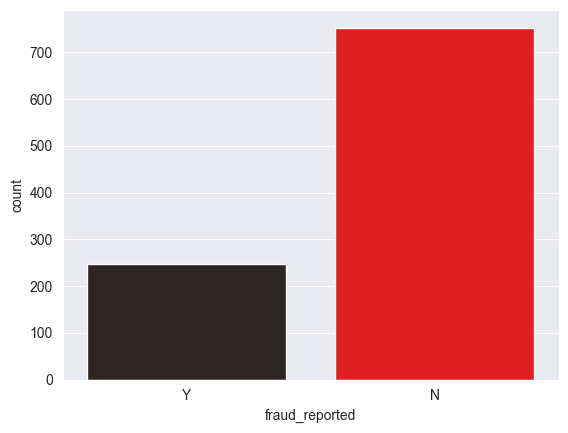

In [18]:
sns.set_style('darkgrid')
sns.countplot(x='fraud_reported',hue='fraud_reported',data=ICDF,color='red')

In [ ]:
# maximum number of count for not reported fraud has been more as compared to fraud reported 

In [19]:
ICDF['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

<Axes: xlabel='police_report_available', ylabel='count'>

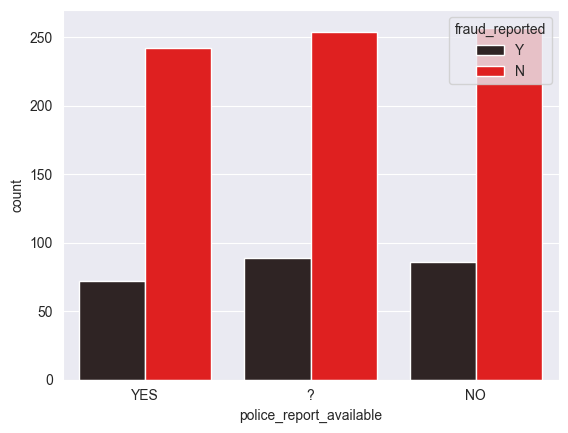

In [20]:
sns.set_style('darkgrid')
sns.countplot(x='police_report_available',data=ICDF,hue='fraud_reported',color='red')

In [ ]:
# Here from the above obseravtion we have seen that for most of the claim police report is not available

<Axes: xlabel='insured_sex', ylabel='count'>

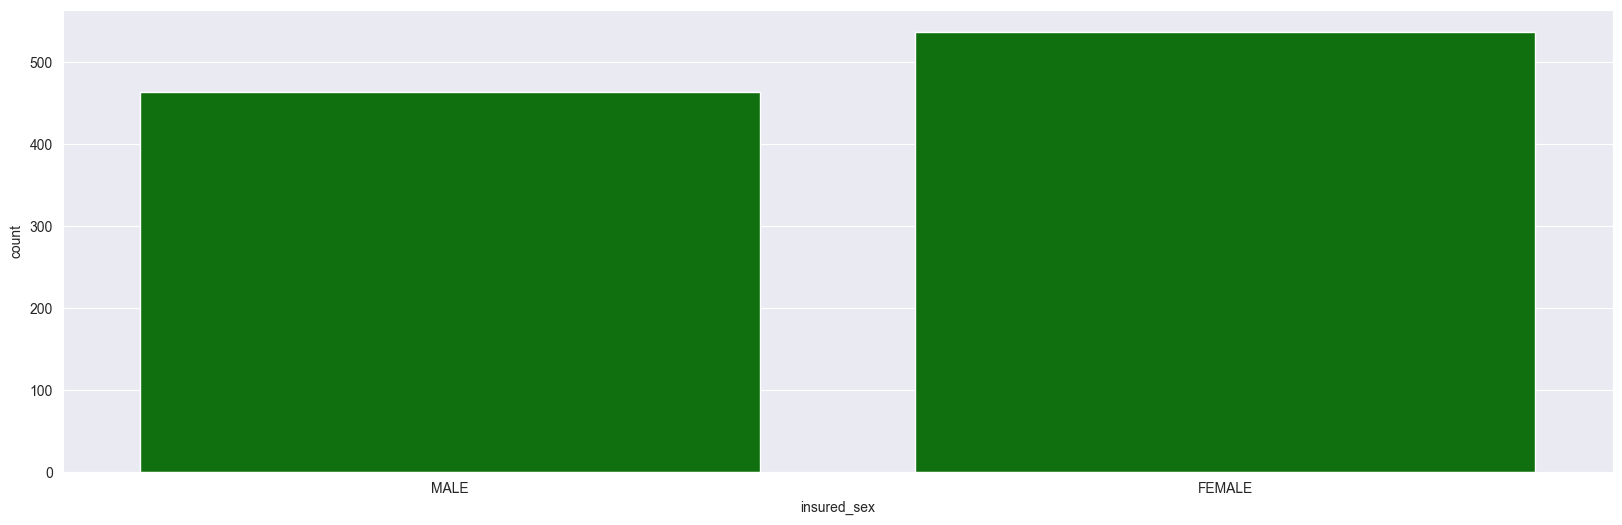

In [21]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='insured_sex',data=ICDF,color='green')

In [ ]:
# Here from the above observation we conclude that highest number of insured person is belong to male category

<Axes: xlabel='insured_education_level', ylabel='count'>

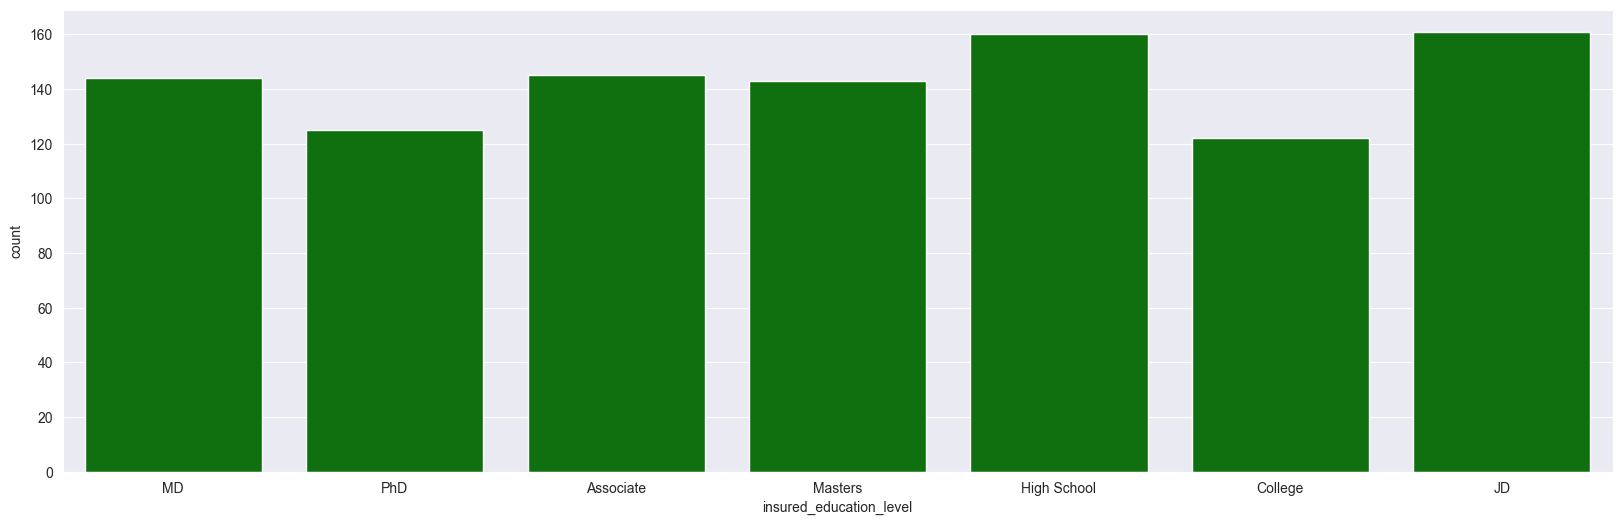

In [22]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='insured_education_level',data=ICDF,color='green')



In [ ]:
# Here from the above observation we conclude that maximum number of insured customer have their education level is High School and JD and least number of insured custome have their education level college 

<Axes: xlabel='insured_hobbies', ylabel='count'>

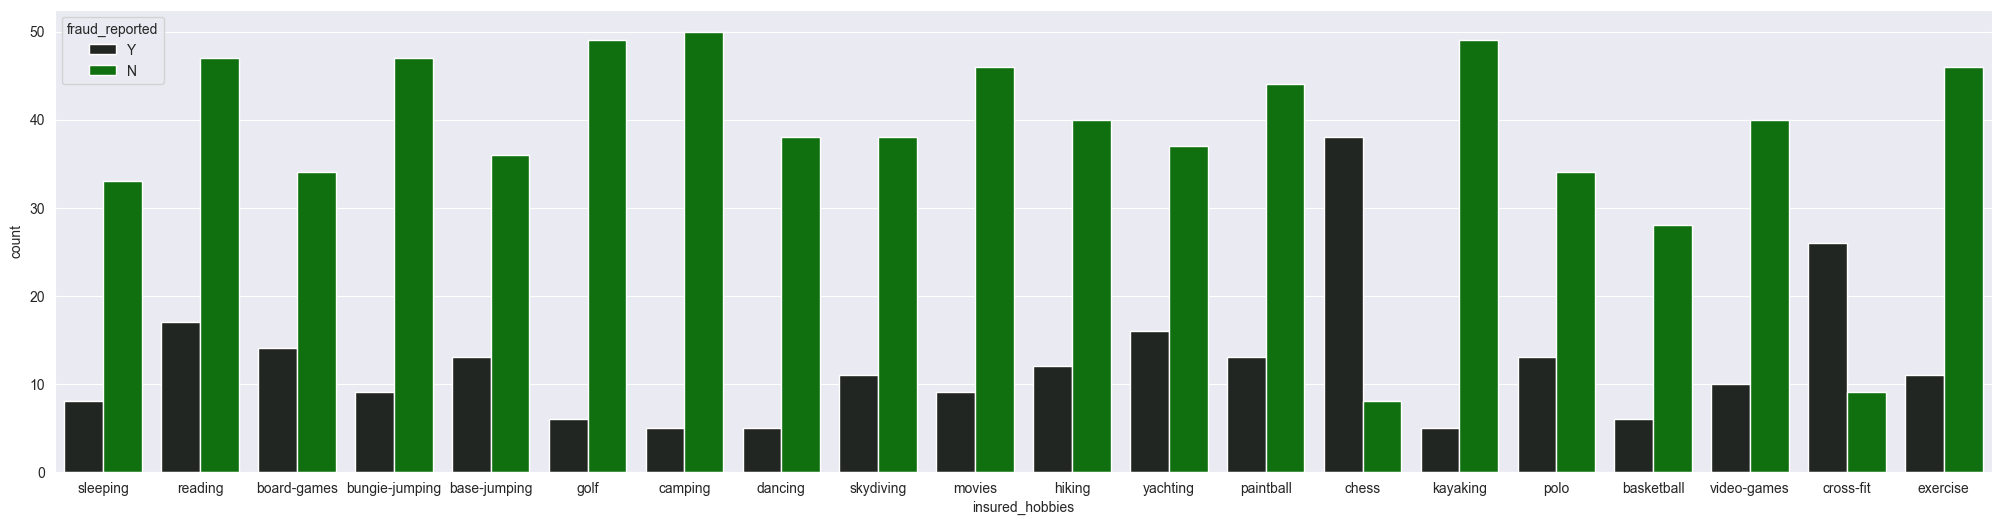

In [23]:
plt.figure(figsize=(25,6))
sns.set_style('darkgrid')
sns.countplot(x='insured_hobbies',data=ICDF,hue='fraud_reported',color='green')

<Axes: xlabel='insured_relationship', ylabel='count'>

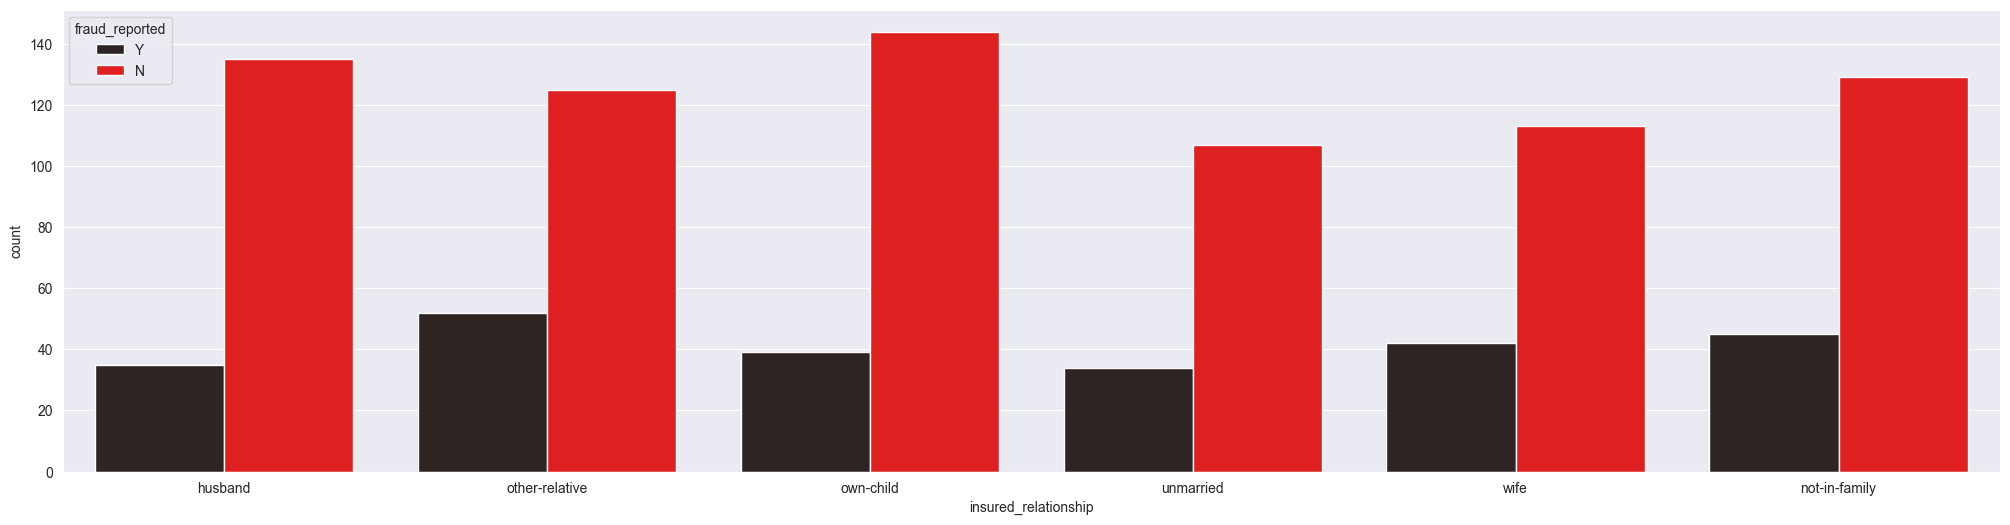

In [24]:
plt.figure(figsize=(25,6))
sns.set_style('darkgrid')
sns.countplot(x='insured_relationship',data=ICDF,hue='fraud_reported',color='red')

In [ ]:
# Maximum number of insured customer who make fake claim have relationship other-relative mqximum number of insured cutomer who didnt make fake claim have relationship own-child

<Axes: xlabel='incident_type', ylabel='count'>

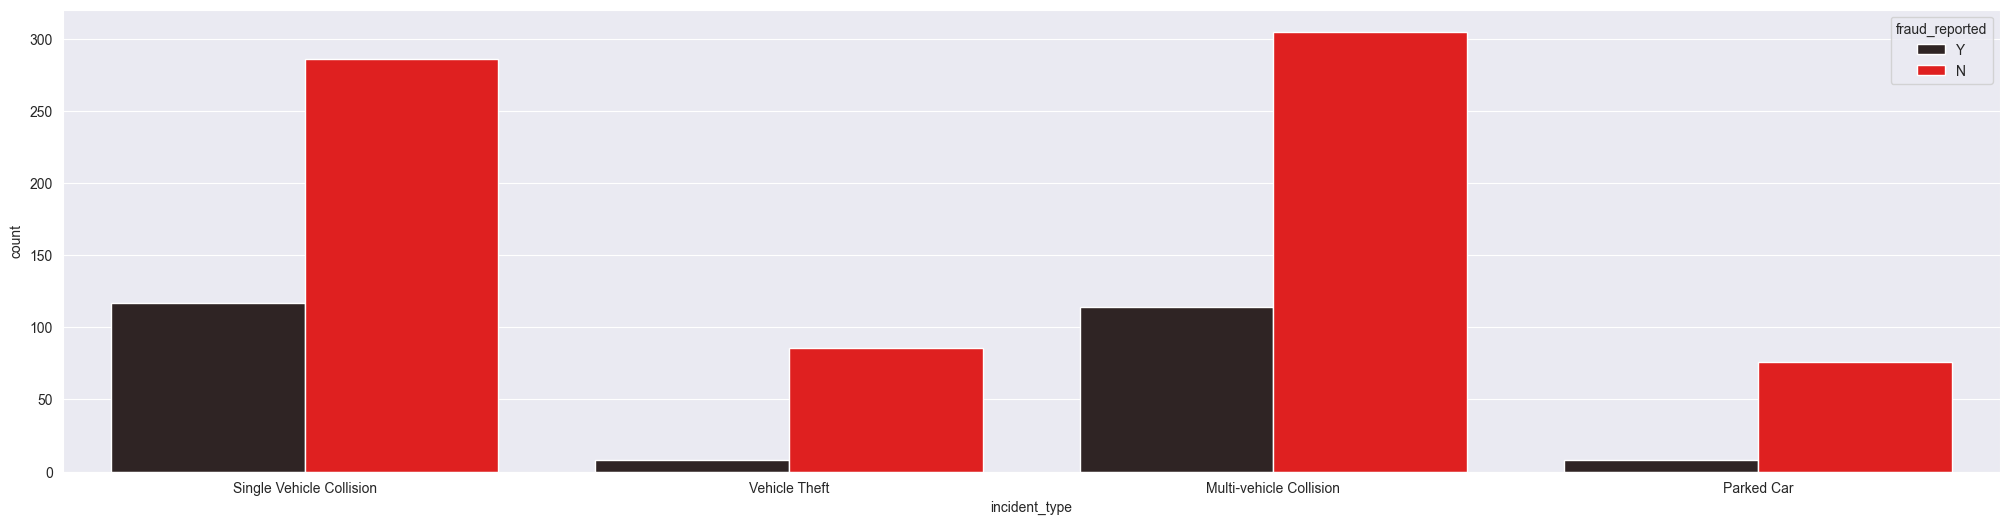

In [25]:
plt.figure(figsize=(25,6))
sns.set_style('darkgrid')
sns.countplot(x='incident_type',data=ICDF,hue='fraud_reported',color='red')

In [62]:
ICDF['incident_type'].value_counts()

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64

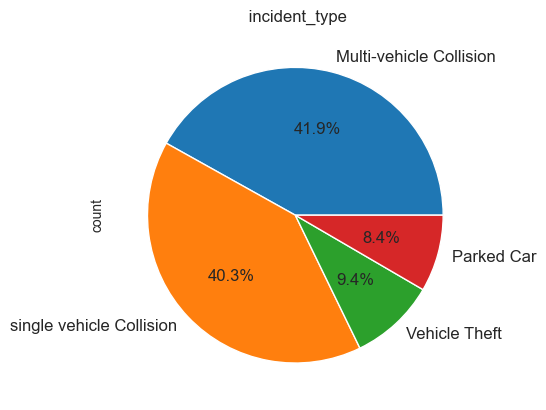

In [43]:
ax = (ICDF['incident_type'].value_counts()*100.0 /len(ICDF)).plot.pie(autopct='%.1f%%', labels = ['Multi-vehicle Collision', 'single vehicle Collision', 'Vehicle Theft', 'Parked Car'],
         fontsize=12)                                                                           
ax.set_title(' incident_type')
plt.show()

In [ ]:
# from the above observation  we conclude that the mostly the type of vehicle damage made by customer is single and Multi-vehicle collision 

<Axes: xlabel='age'>

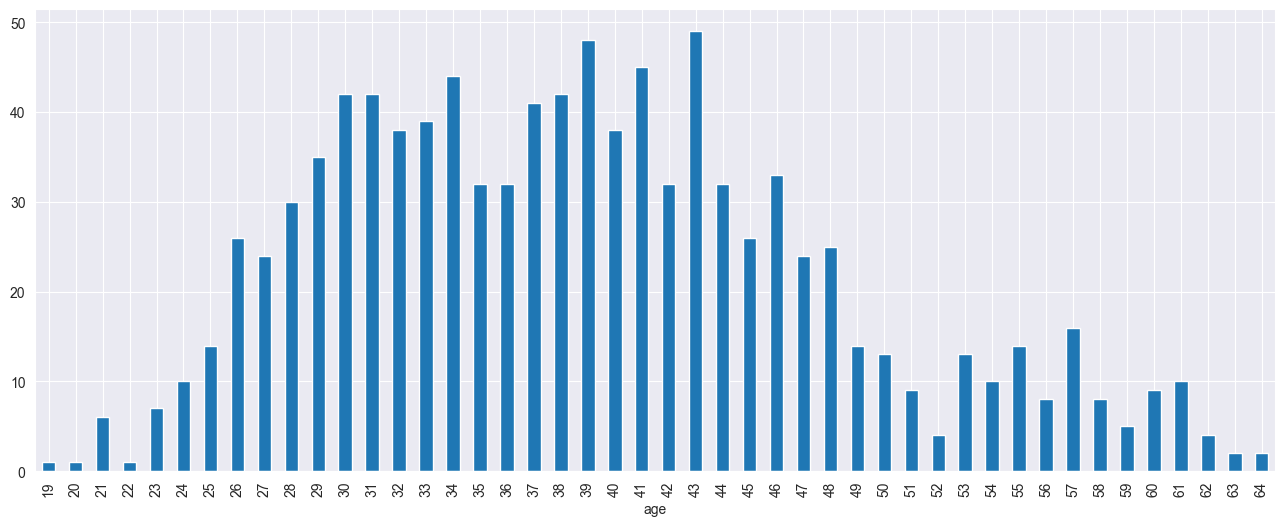

In [25]:
plt.figure(figsize=(16,6))
ICDF.groupby('age')['fraud_reported'].count().plot(kind='bar')

In [ ]:
# Here from the above observation  we conclude that the age of maximum number of insured customer who make fake claim is 43 year

<Axes: xlabel='policy_state', ylabel='count'>

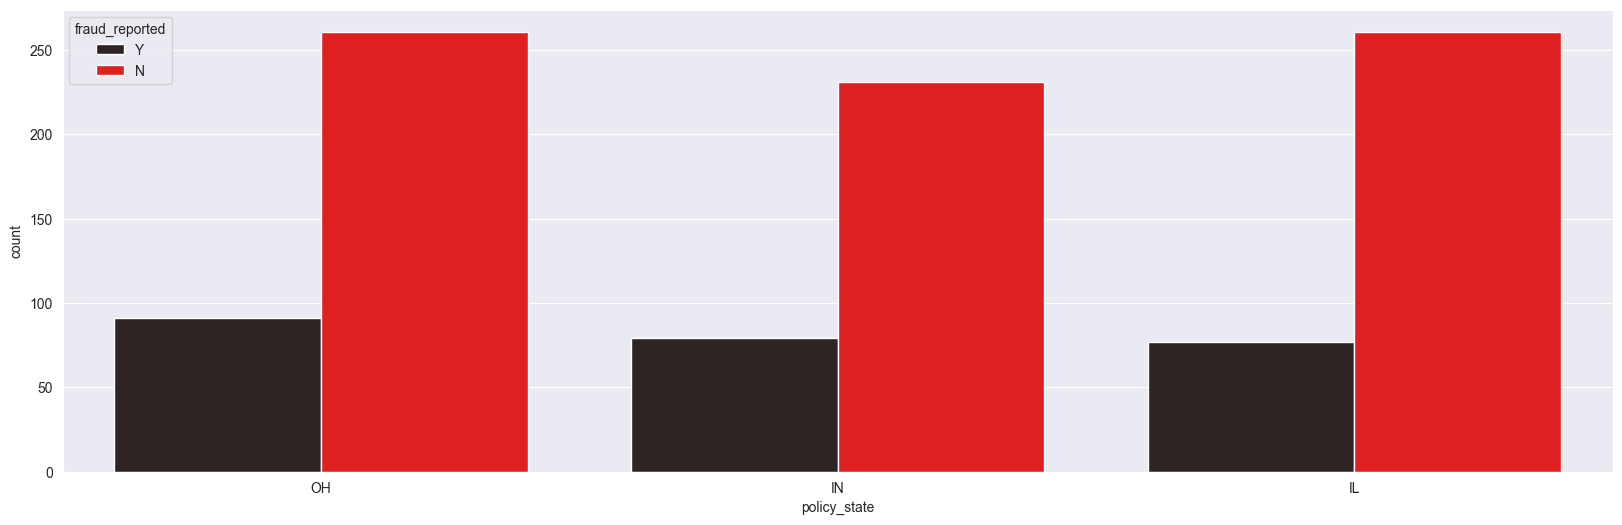

In [44]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='policy_state',data=ICDF,hue='fraud_reported',color='red')

In [ ]:
# Here from the above observation we conclude that mostly the fraud reported for the policy_state OH

<Axes: xlabel='insured_occupation', ylabel='count'>

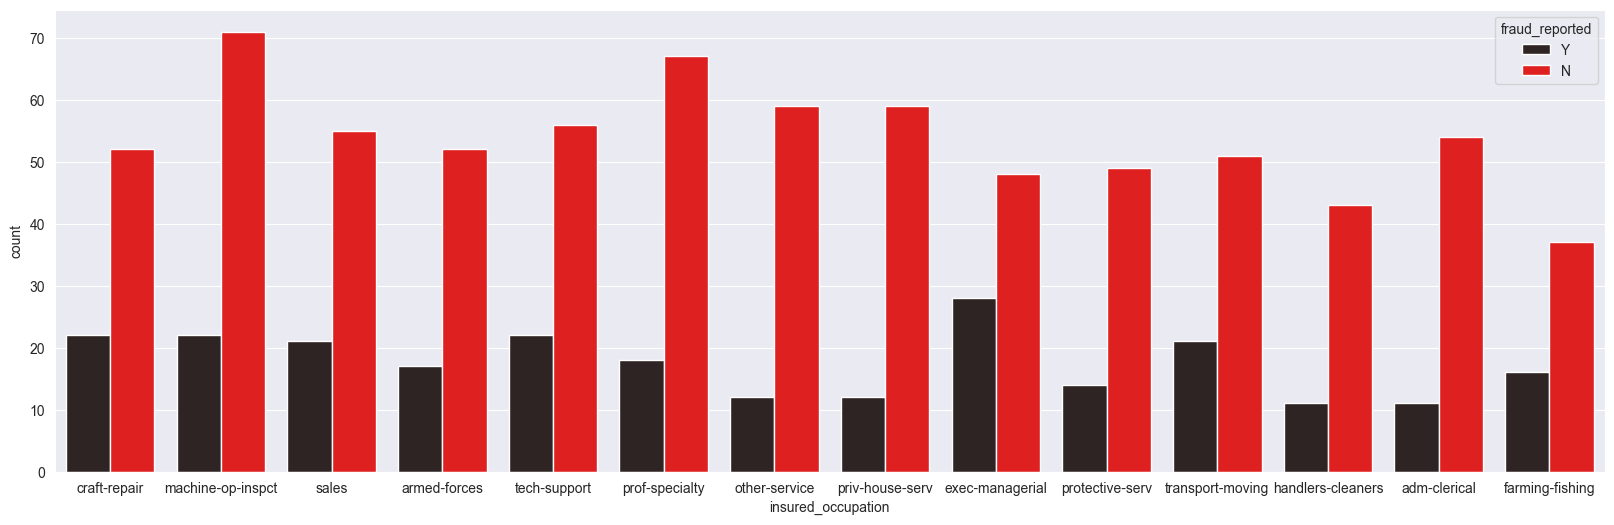

In [29]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='insured_occupation',data=ICDF,hue='fraud_reported',color='red')

<Axes: xlabel='collision_type', ylabel='count'>

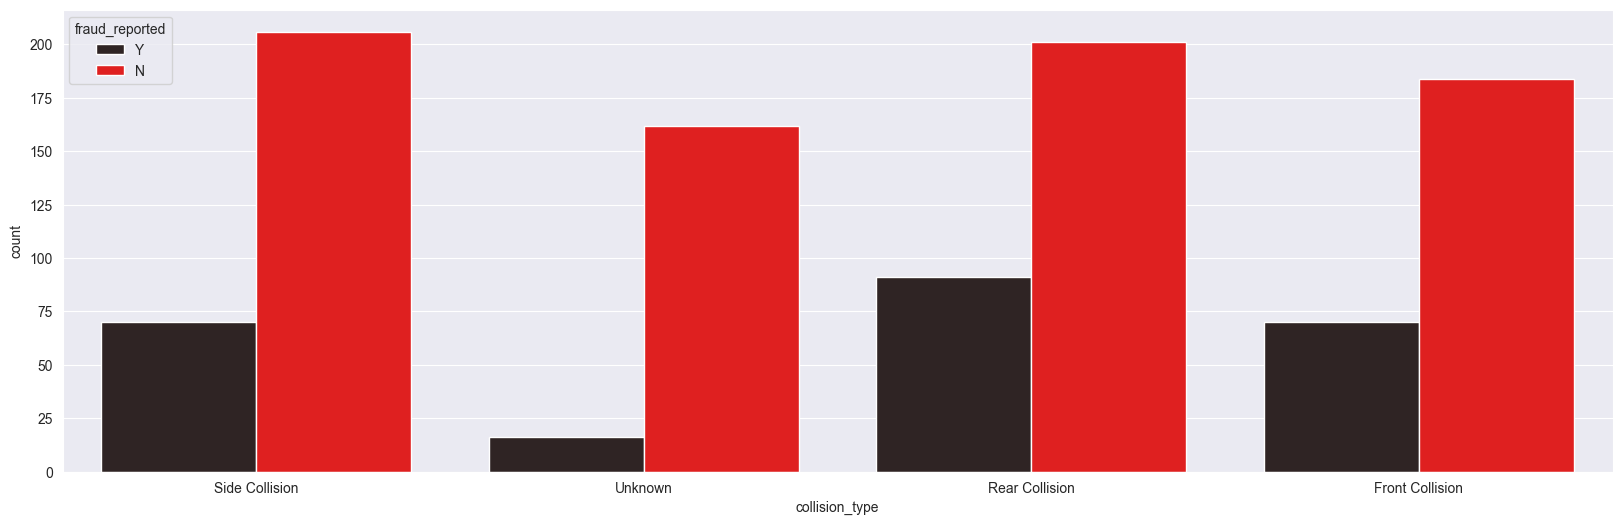

In [31]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='collision_type',data=ICDF,hue='fraud_reported',color='red')

<Axes: xlabel='incident_severity', ylabel='count'>

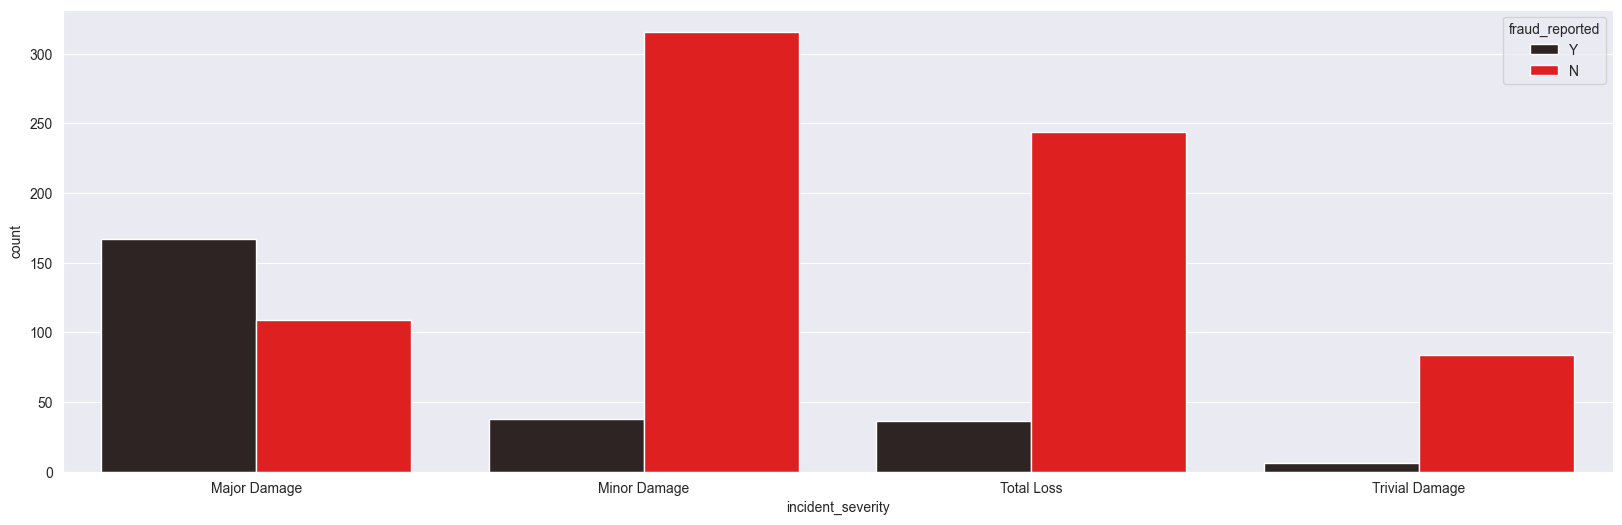

In [32]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='incident_severity',data=ICDF,hue='fraud_reported',color='red')

<Axes: xlabel='authorities_contacted', ylabel='count'>

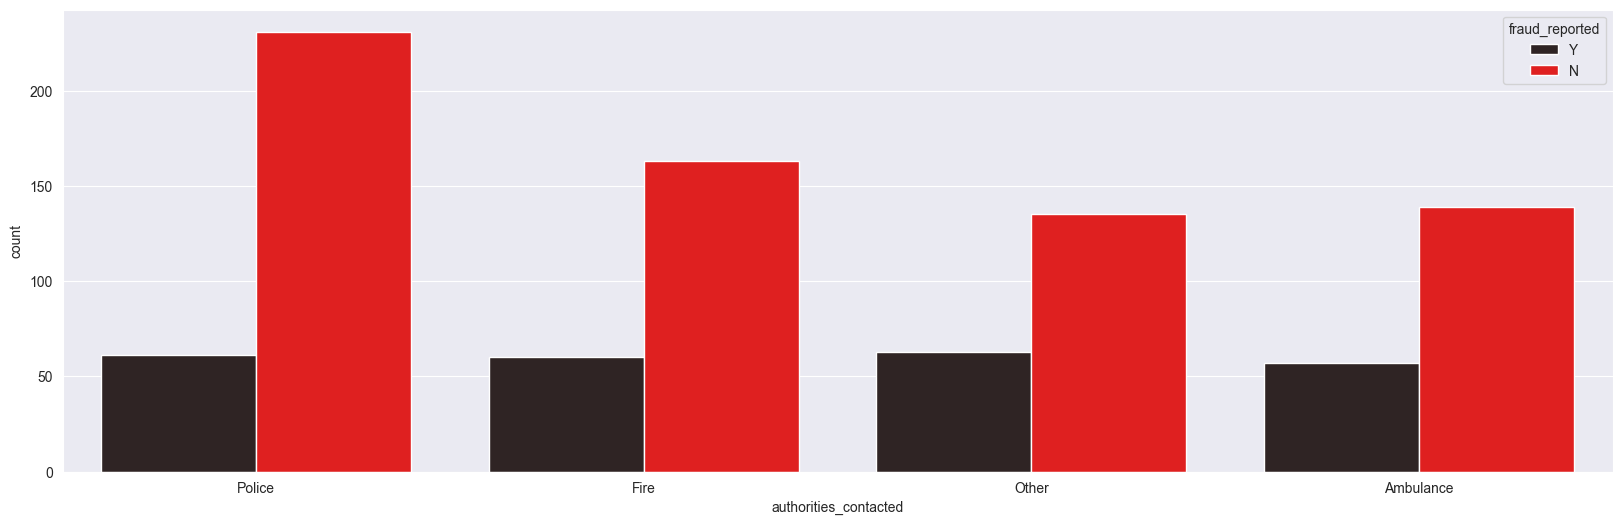

In [33]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='authorities_contacted',data=ICDF,hue='fraud_reported',color='red')

<Axes: xlabel='incident_state', ylabel='count'>

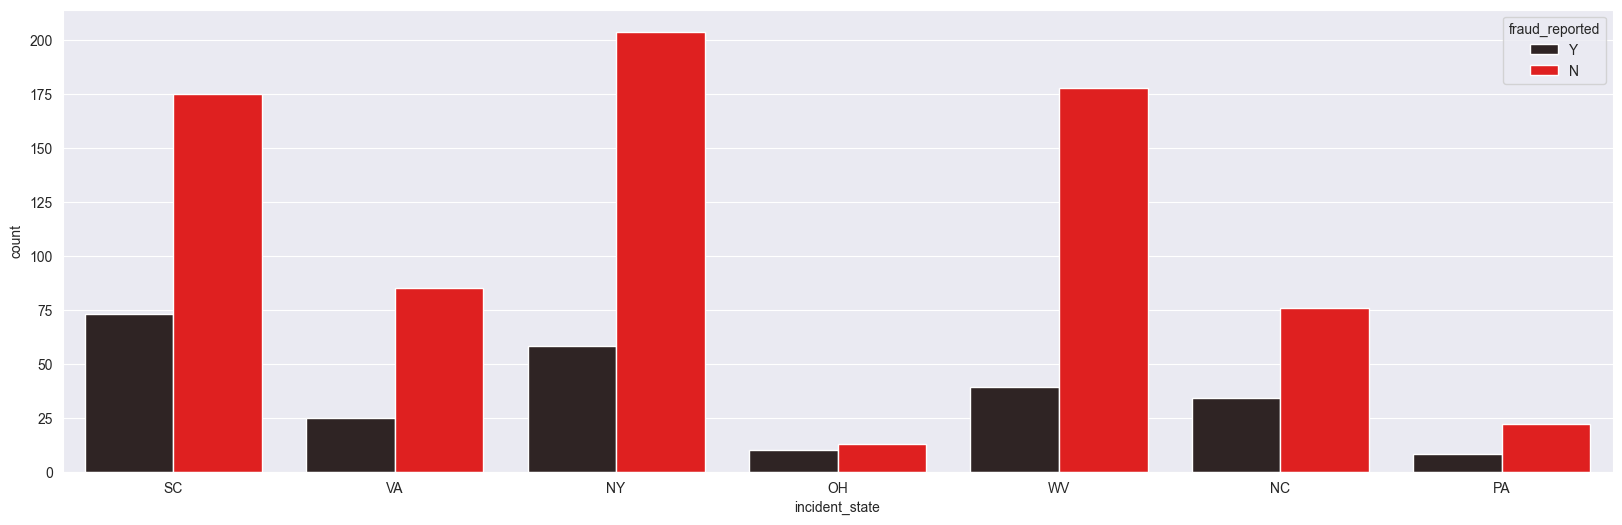

In [34]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='incident_state',data=ICDF,hue='fraud_reported',color='red')

<Axes: xlabel='incident_city', ylabel='count'>

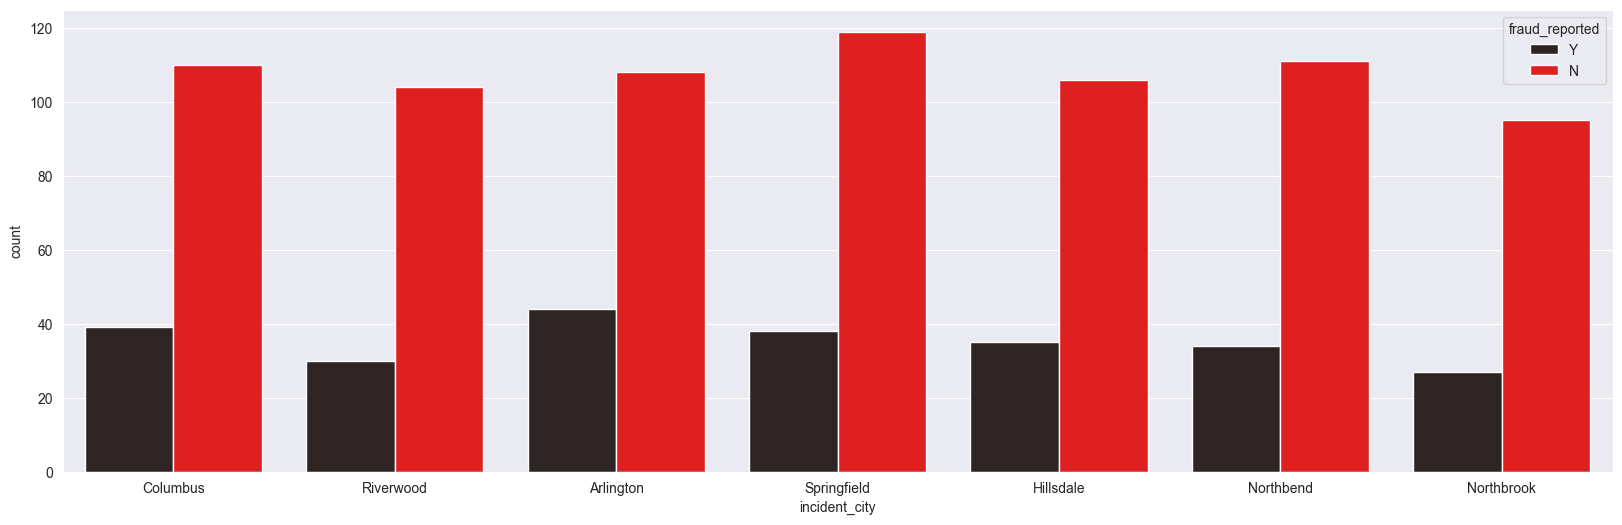

In [35]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='incident_city',data=ICDF,hue='fraud_reported',color='red')

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

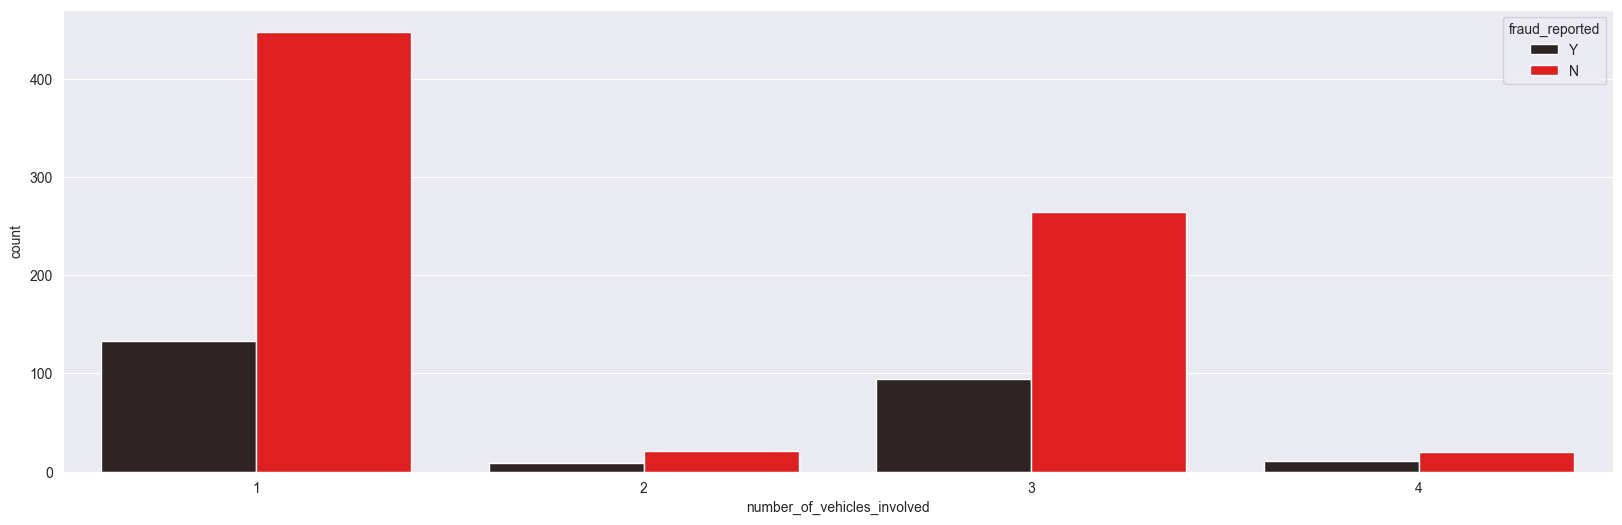

In [44]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(x='number_of_vehicles_involved',data=ICDF,hue='fraud_reported',color='red')

In [ ]:
# Here from above observation we conclude that  the maximum number of vehicle involved during accident is 1 and reported not fraud 
# maximum number of vehicle involved in accident and reported fraud is also 1

<Axes: xlabel='insured_education_level'>

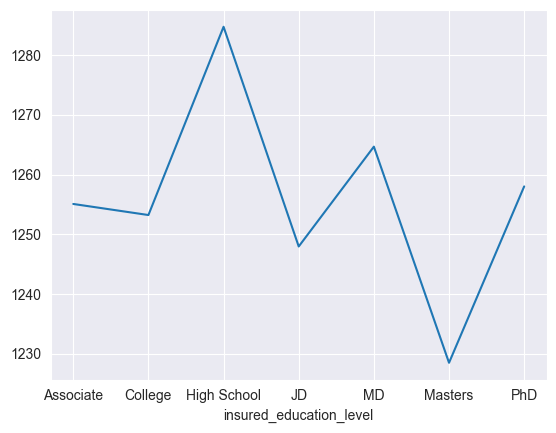

In [24]:


df_avg_prem = ICDF.groupby('insured_education_level')['policy_annual_premium'].mean()
df_avg_prem.plot()

<Axes: xlabel='fraud_reported'>

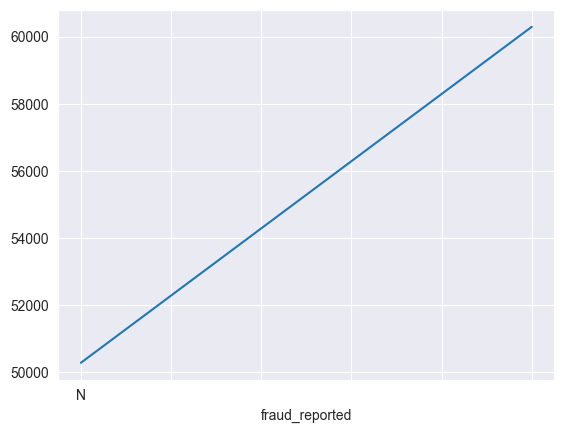

In [25]:


df_avg_prem = ICDF.groupby('fraud_reported')['total_claim_amount'].mean()
df_avg_prem.plot()

<Axes: xlabel='collision_type', ylabel='total_claim_amount'>

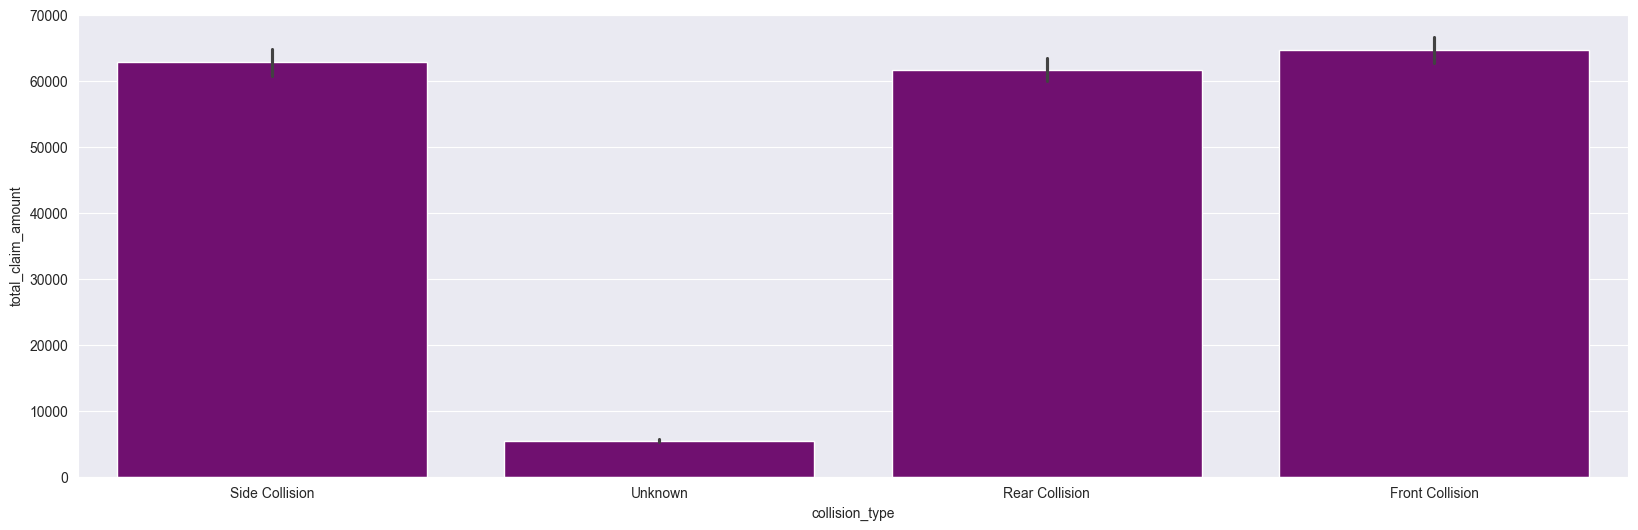

In [52]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.barplot(x='collision_type',y='total_claim_amount',data=ICDF,color='purple')


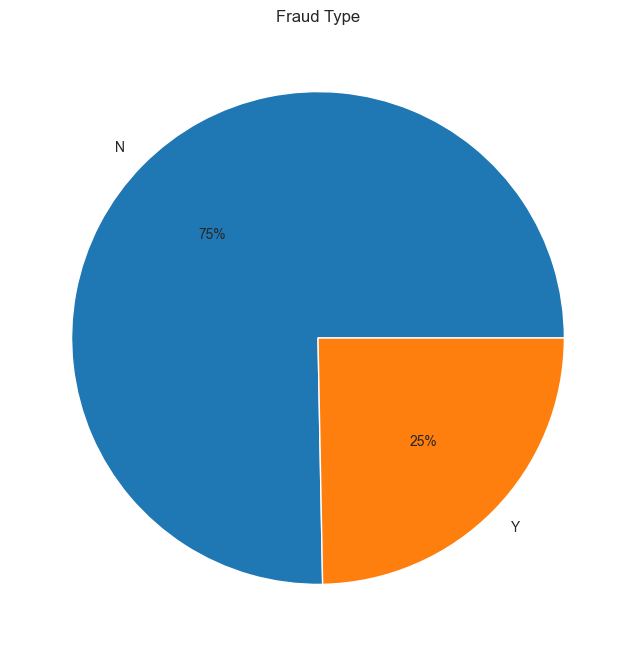

In [26]:
plt.figure(figsize=(10,8))
plt.pie(ICDF.fraud_reported.value_counts().values,labels=ICDF.fraud_reported.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()

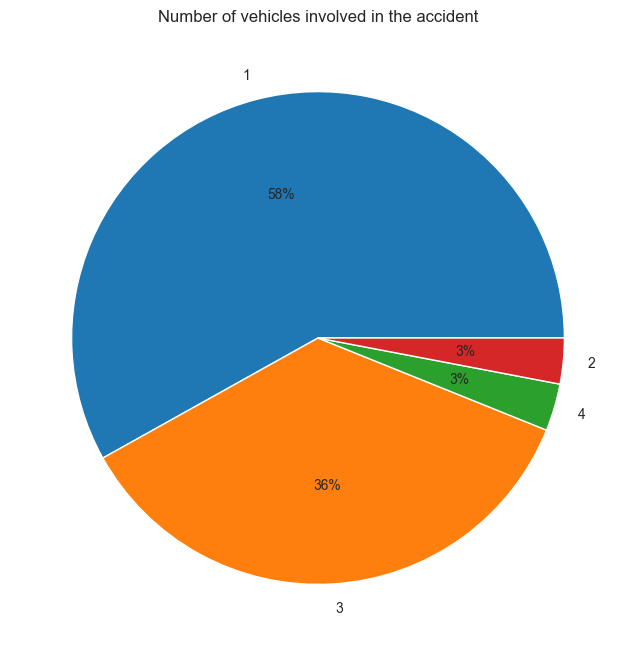

In [27]:
plt.figure(figsize=(10,8))
plt.pie(ICDF.number_of_vehicles_involved.value_counts().values,labels=ICDF.number_of_vehicles_involved.value_counts().index,  autopct='%.0f%%')
plt.title("Number of vehicles involved in the accident")
plt.show()

In [ ]:
# from the observation we conclude that mostly the number of vehicles involved in the accident is 1.

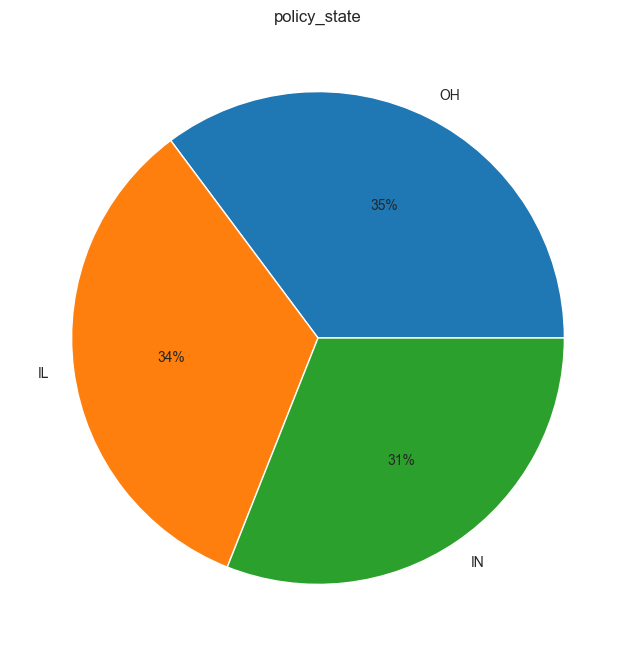

In [33]:
plt.figure(figsize=(10,8))
plt.pie(ICDF.policy_state.value_counts().values,labels=ICDF.policy_state.value_counts().index,  autopct='%.0f%%')
plt.title("policy_state")
plt.show()

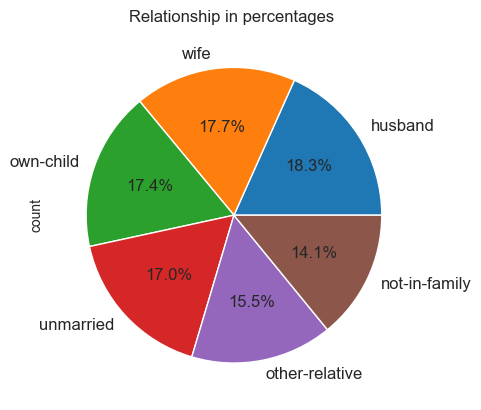

In [40]:
ax = (ICDF['insured_relationship'].value_counts()*100.0 /len(ICDF)).plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('Relationship in percentages ')
plt.show()

In [37]:
ICDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [38]:
                                    # SEPARATING CATEGORICAL AND NUMERICAL FEATURES

In [40]:
categorical=[]
numerical=[]
for col in ICDF:
    if ICDF[col].dtypes=='object':
        categorical.append(col)
    else:
        numerical.append(col)

In [41]:
categorical

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [42]:
numerical

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [44]:
#dropping missing values 
ICDF.dropna(inplace=True)

In [45]:
ICDF.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<Axes: >

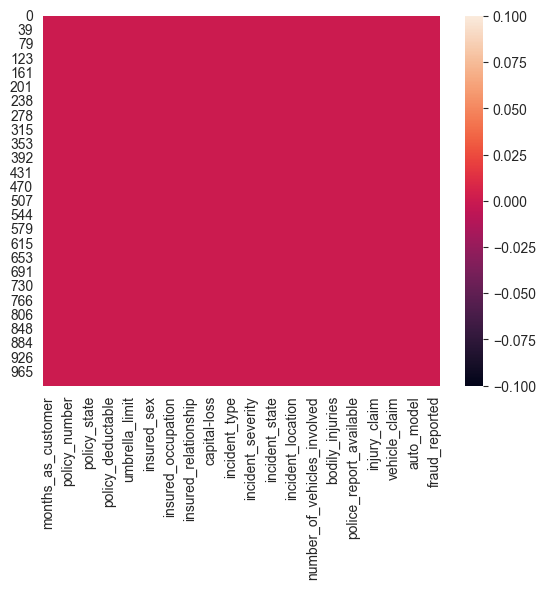

In [46]:
sns.heatmap(ICDF.isnull())

In [ ]:
                ENCODING CATEGORICAL FEATURES

In [47]:
le=LabelEncoder()
for col in categorical:
    ICDF[col]=le.fit_transform(ICDF[col])

In [48]:
ICDF

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               485             2   
1                   228   42         342868               745             1   
2                   134   29         687698               166             2   
3                   256   41         227811               694             0   
5                   256   39         104594               354             2   
..                  ...  ...            ...               ...           ...   
995                   3   38         941851               446             2   
996                 285   41         186934               113             0   
997                 130   34         918516               466             2   
998                 458   62         533940               519             0   
999                 456   60         556080               330             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
5             1               1000                1351.10               0   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        2               71610   
1         468176  ...          0                        1                5070   
2         430632  ...          3                        0               34650   
3         608117  ...          2                        0               63400   
5         478456  ...          2                        0               64100   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        1               87200   
996       608177  ...          3                        1              108480   
997       442797  ...          3                        2               67500   
998       441714  ...          1                        2               46980   
999       612260  ...          3                        1                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080         10           1   
1             780             780           3510          8          12   
2            7700            3850          23100          4          30   
3            6340            6340          50720          3          34   
5            6410            6410          51280         10           3   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040          6           6   
996         18080           18080          72320         13          28   
997          7500            7500          52500         11          19   
998          5220            5220          36540          1           5   
999           460             920           3680          8          12   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
5         2003               1  
..         ...             ...  
995       2006            

In [ ]:
# Now all the categorical feature converted to numerical feature 

In [49]:
correlation=ICDF.corr()

In [50]:
correlation['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.117877
total_claim_amount             0.110167
property_claim                 0.091455
umbrella_limit                 0.064335
policy_bind_date               0.057704
property_damage                0.054404
witnesses                      0.051339
insured_sex                    0.044894
injury_claim                   0.038400
policy_state                   0.034799
bodily_injuries                0.034726
insured_zip                    0.022950
months_as_customer             0.018345
number_of_vehicles_involved    0.018269
policy_deductable              0.017593
insured_relationship           0.015406
age                            0.011174
insured_occupation             0.009954
auto_year                      0.009445
auto_model                     0.003409
insured_education_level        0.001668
incident_location             -0.008301
policy_annual_premium         -0.016294
policy_csl                    -0.016586


<Axes: >

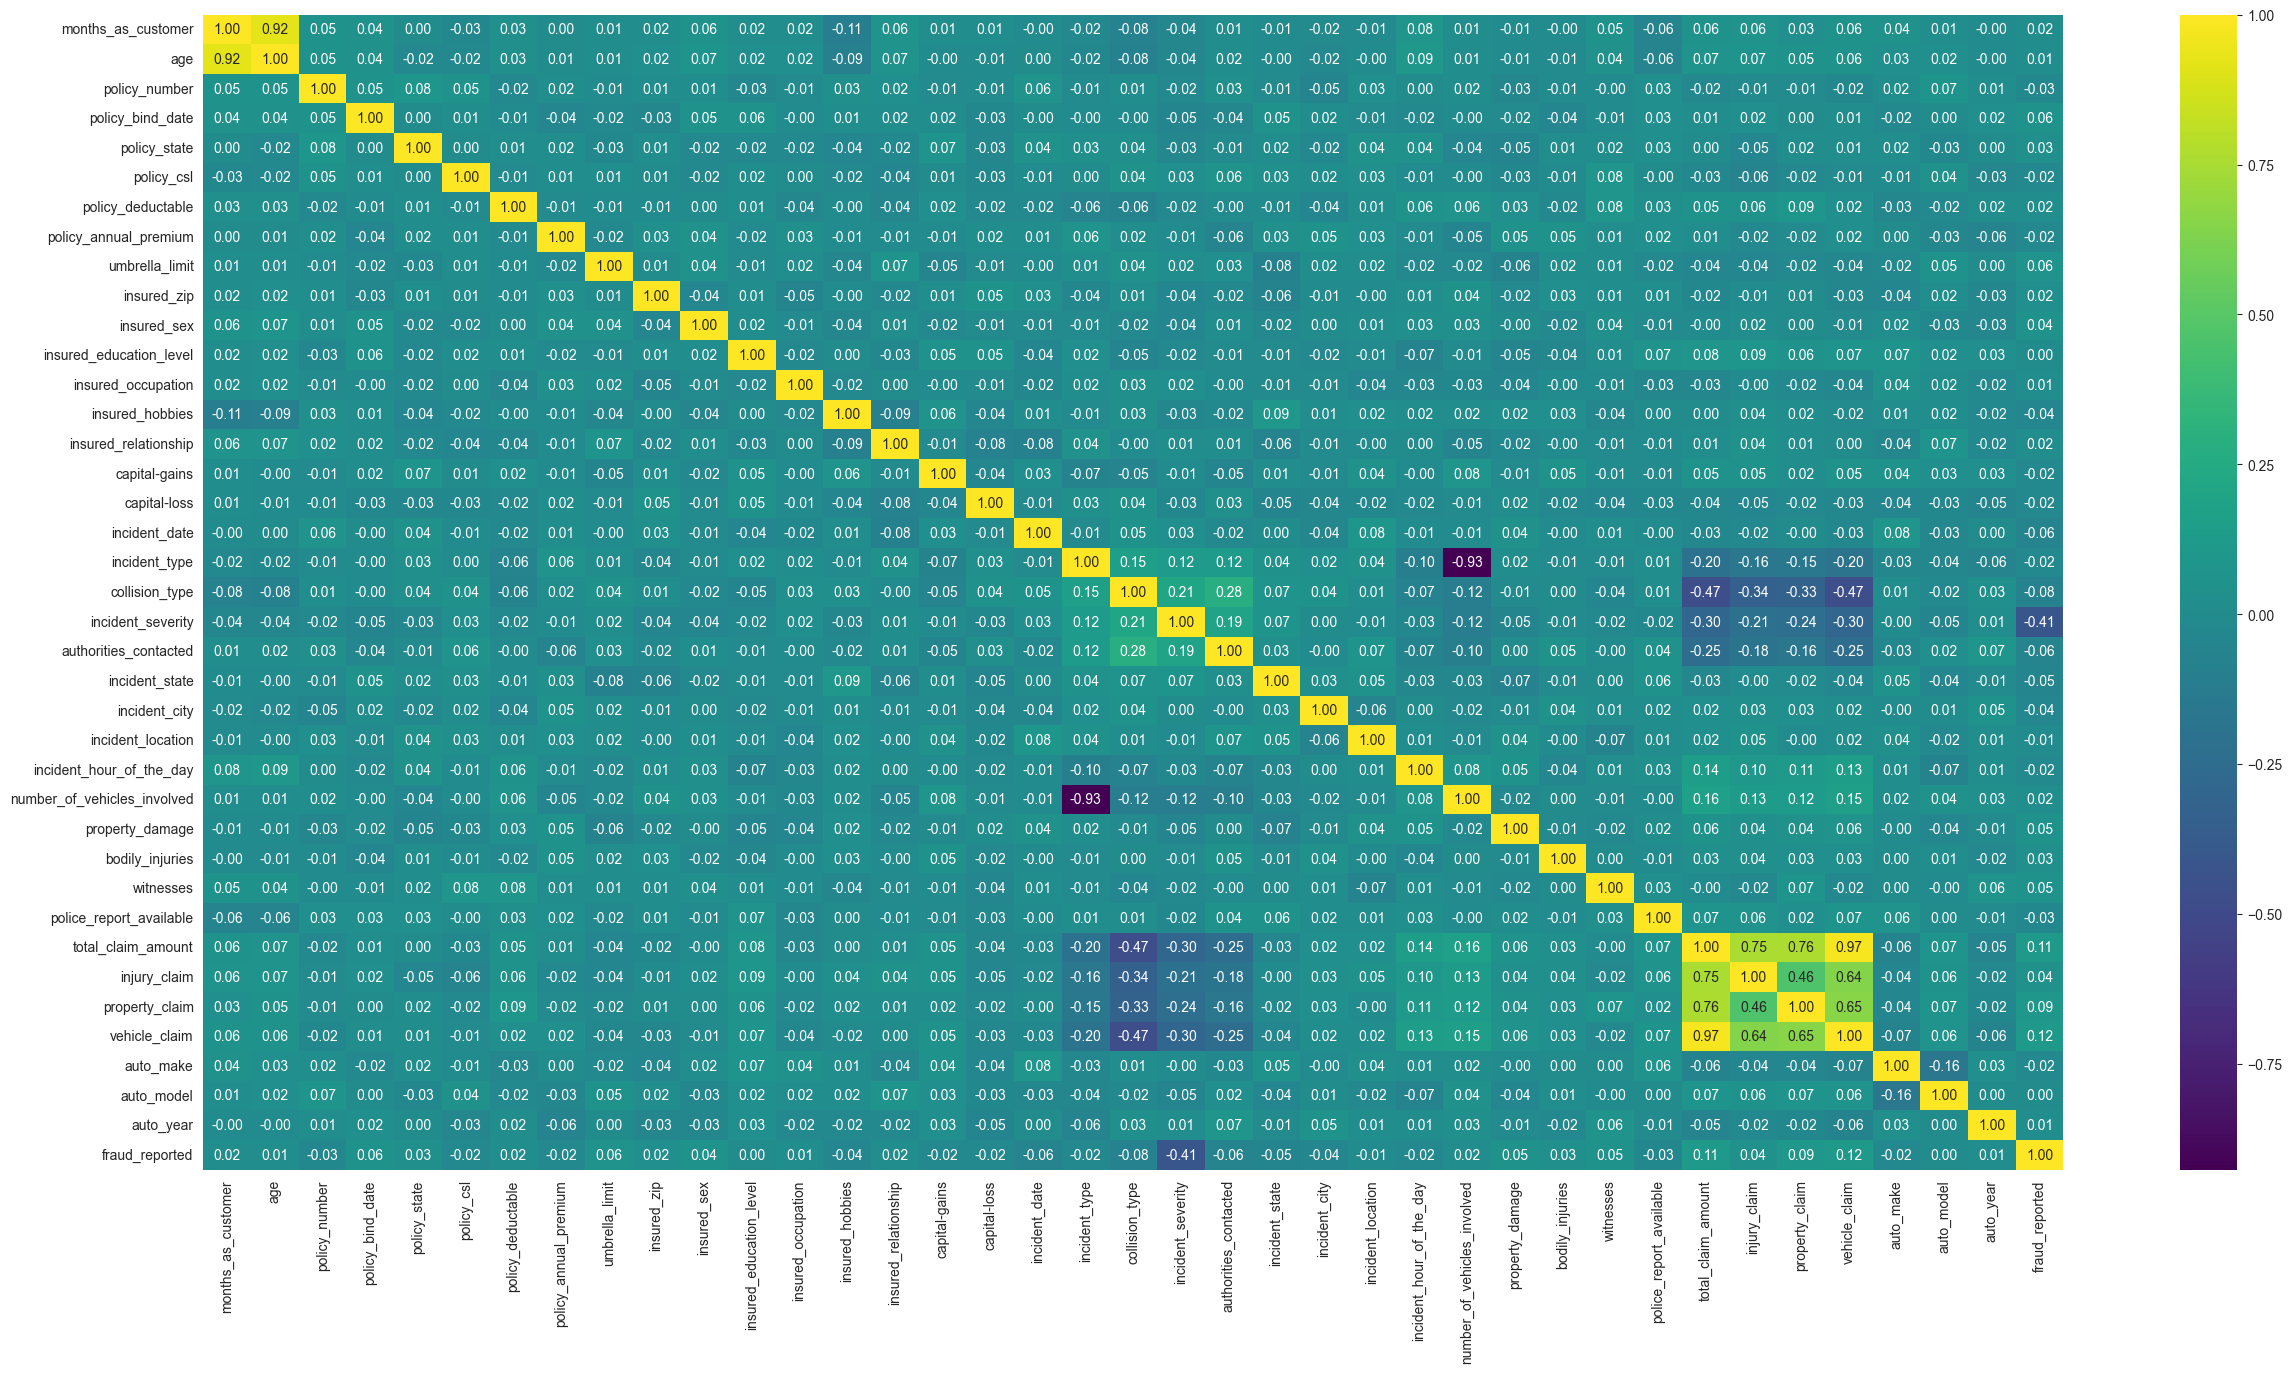

In [56]:
plt.figure(figsize =(30,15))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

<Axes: xlabel='vehicle_claim', ylabel='total_claim_amount'>

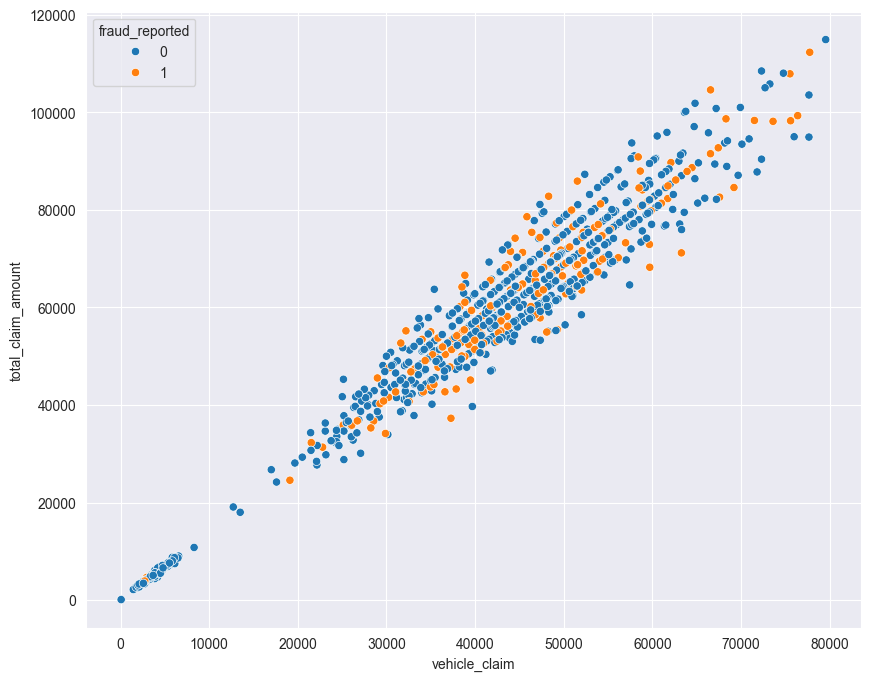

In [63]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='vehicle_claim',y='total_claim_amount',hue='fraud_reported',data=ICDF,color='red')

<Axes: xlabel='vehicle_claim', ylabel='injury_claim'>

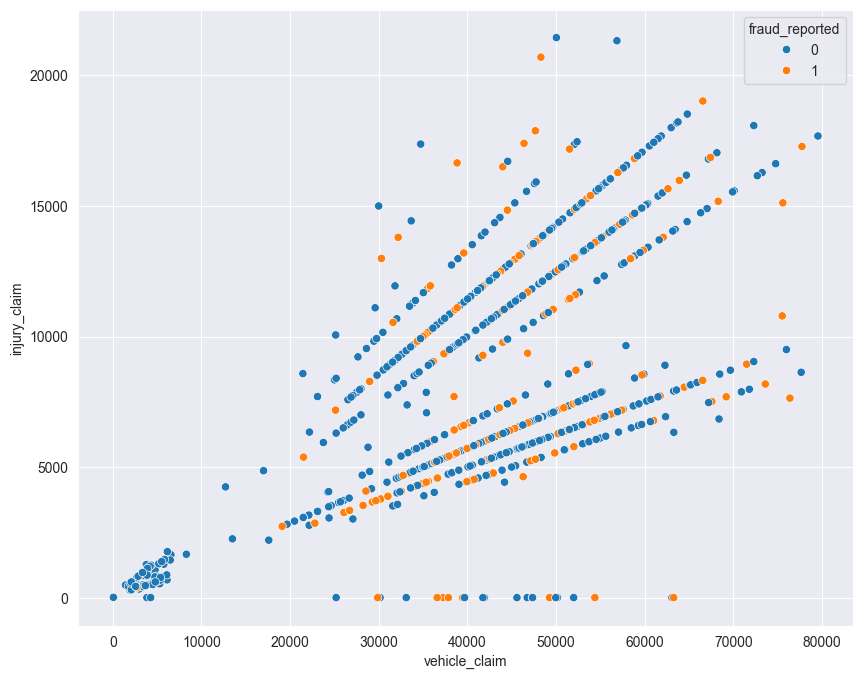

In [64]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='vehicle_claim',y='injury_claim',data=ICDF,hue='fraud_reported',color='red')

<Axes: xlabel='vehicle_claim', ylabel='property_claim'>

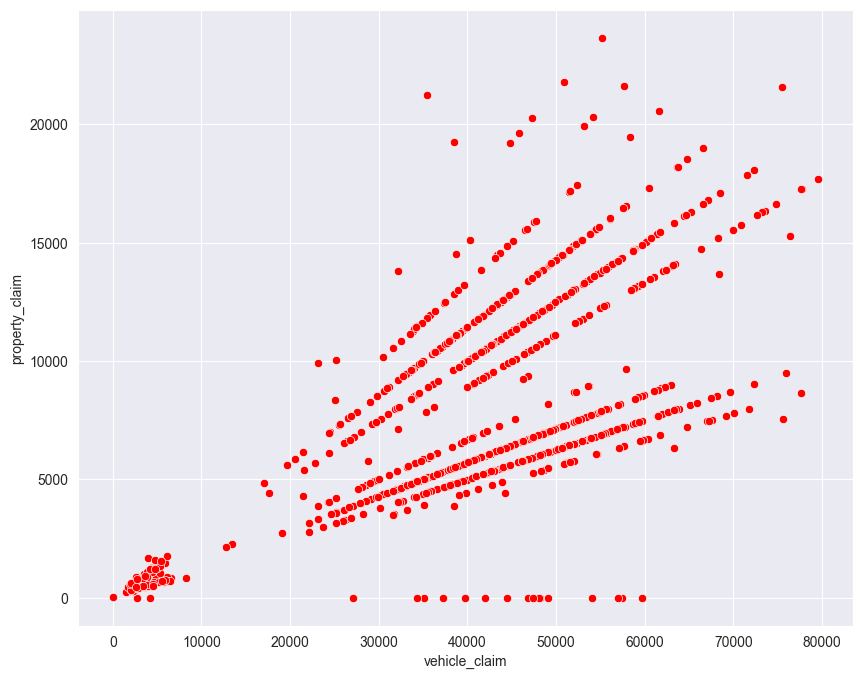

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='vehicle_claim',y='property_claim',data=ICDF,color='red')

<Axes: xlabel='incident_type', ylabel='number_of_vehicles_involved'>

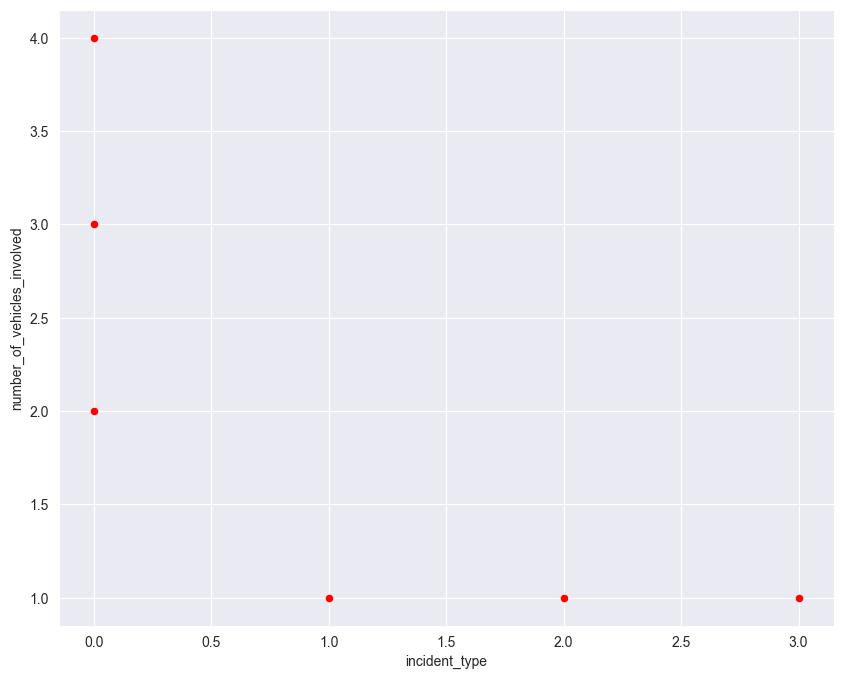

In [61]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='incident_type',y='number_of_vehicles_involved',data=ICDF,color='red')

<Axes: xlabel='property_claim', ylabel='total_claim_amount'>

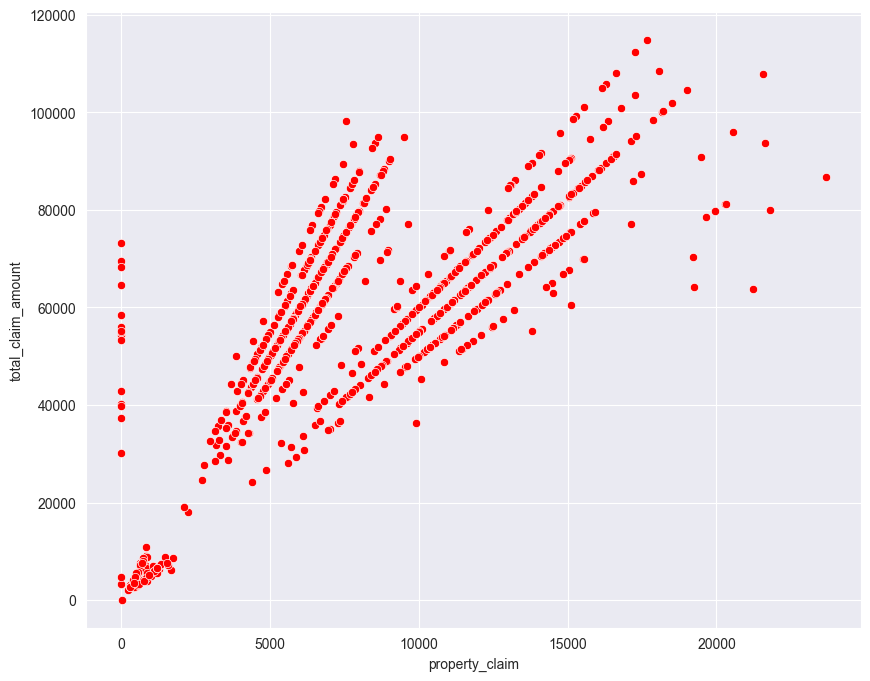

In [62]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='property_claim',y='total_claim_amount',data=ICDF,color='red')

Text(0, 0.5, 'Claim amount ($)')

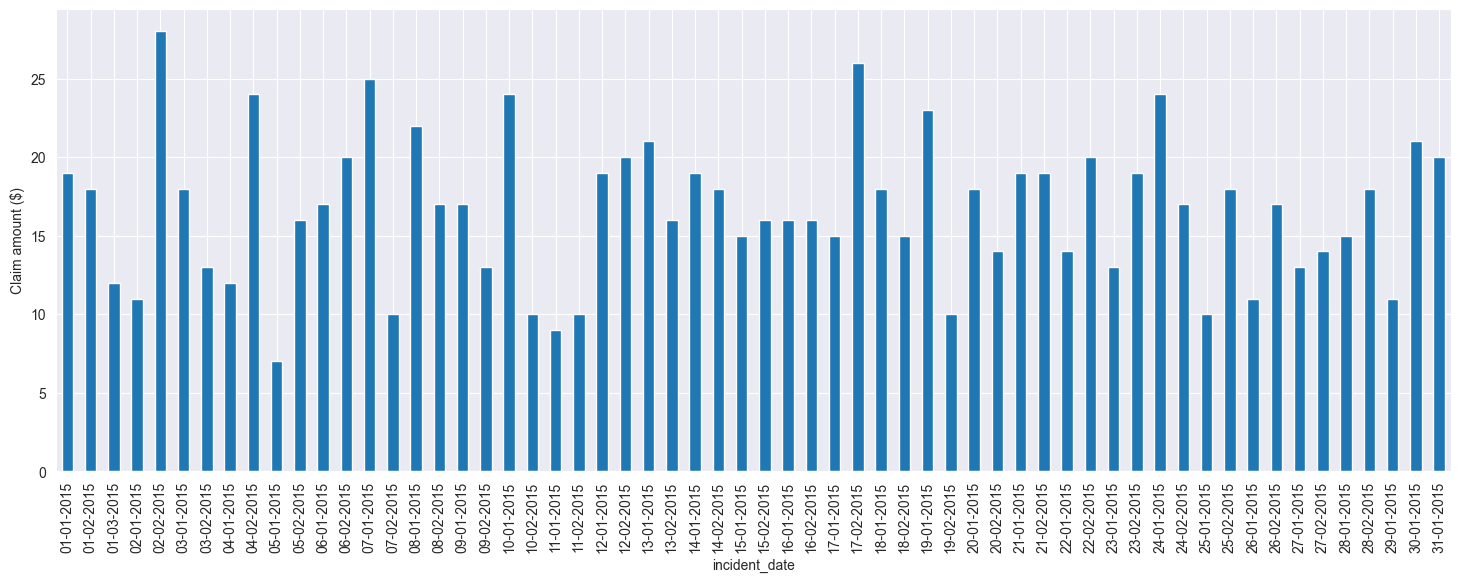

In [37]:
fig = plt.figure(figsize=(18,6))
ax = ICDF.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')

In [ ]:
                    #checking for the distribution of data in the features 

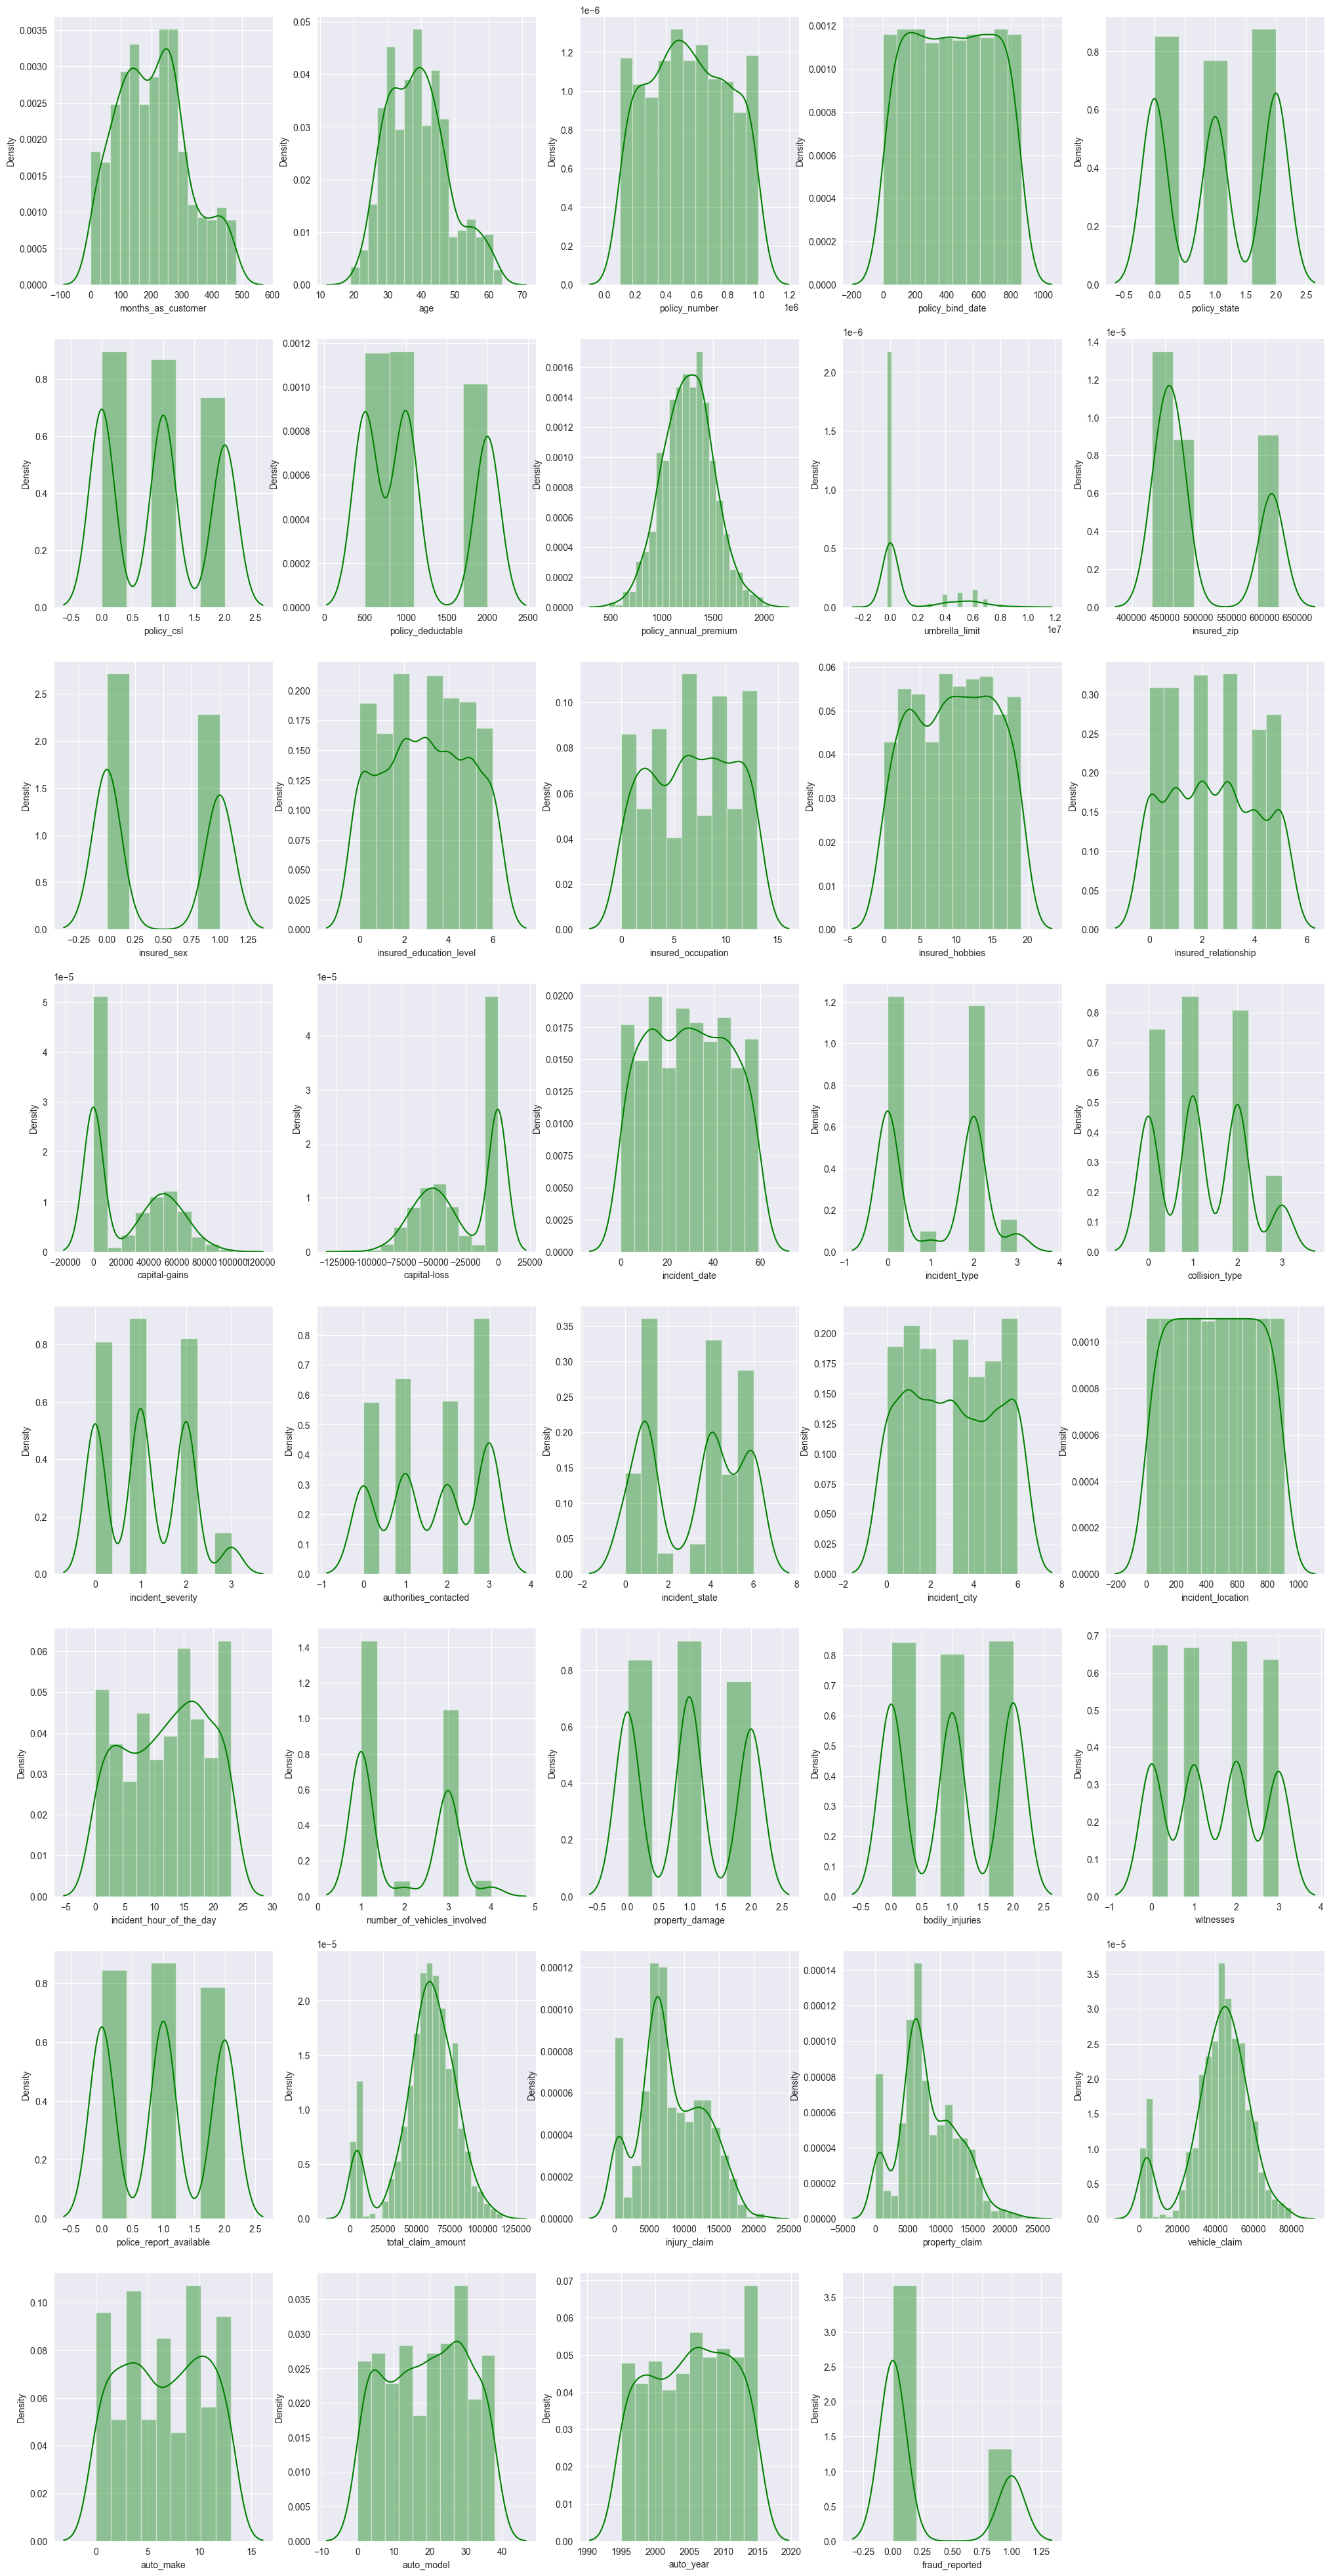

In [66]:
plt.figure(figsize=(25,50))
for col in enumerate(ICDF):
    plt.subplot(8,5,col[0]+1)
    sns.distplot(ICDF[col[1]],color='green')
plt.show()

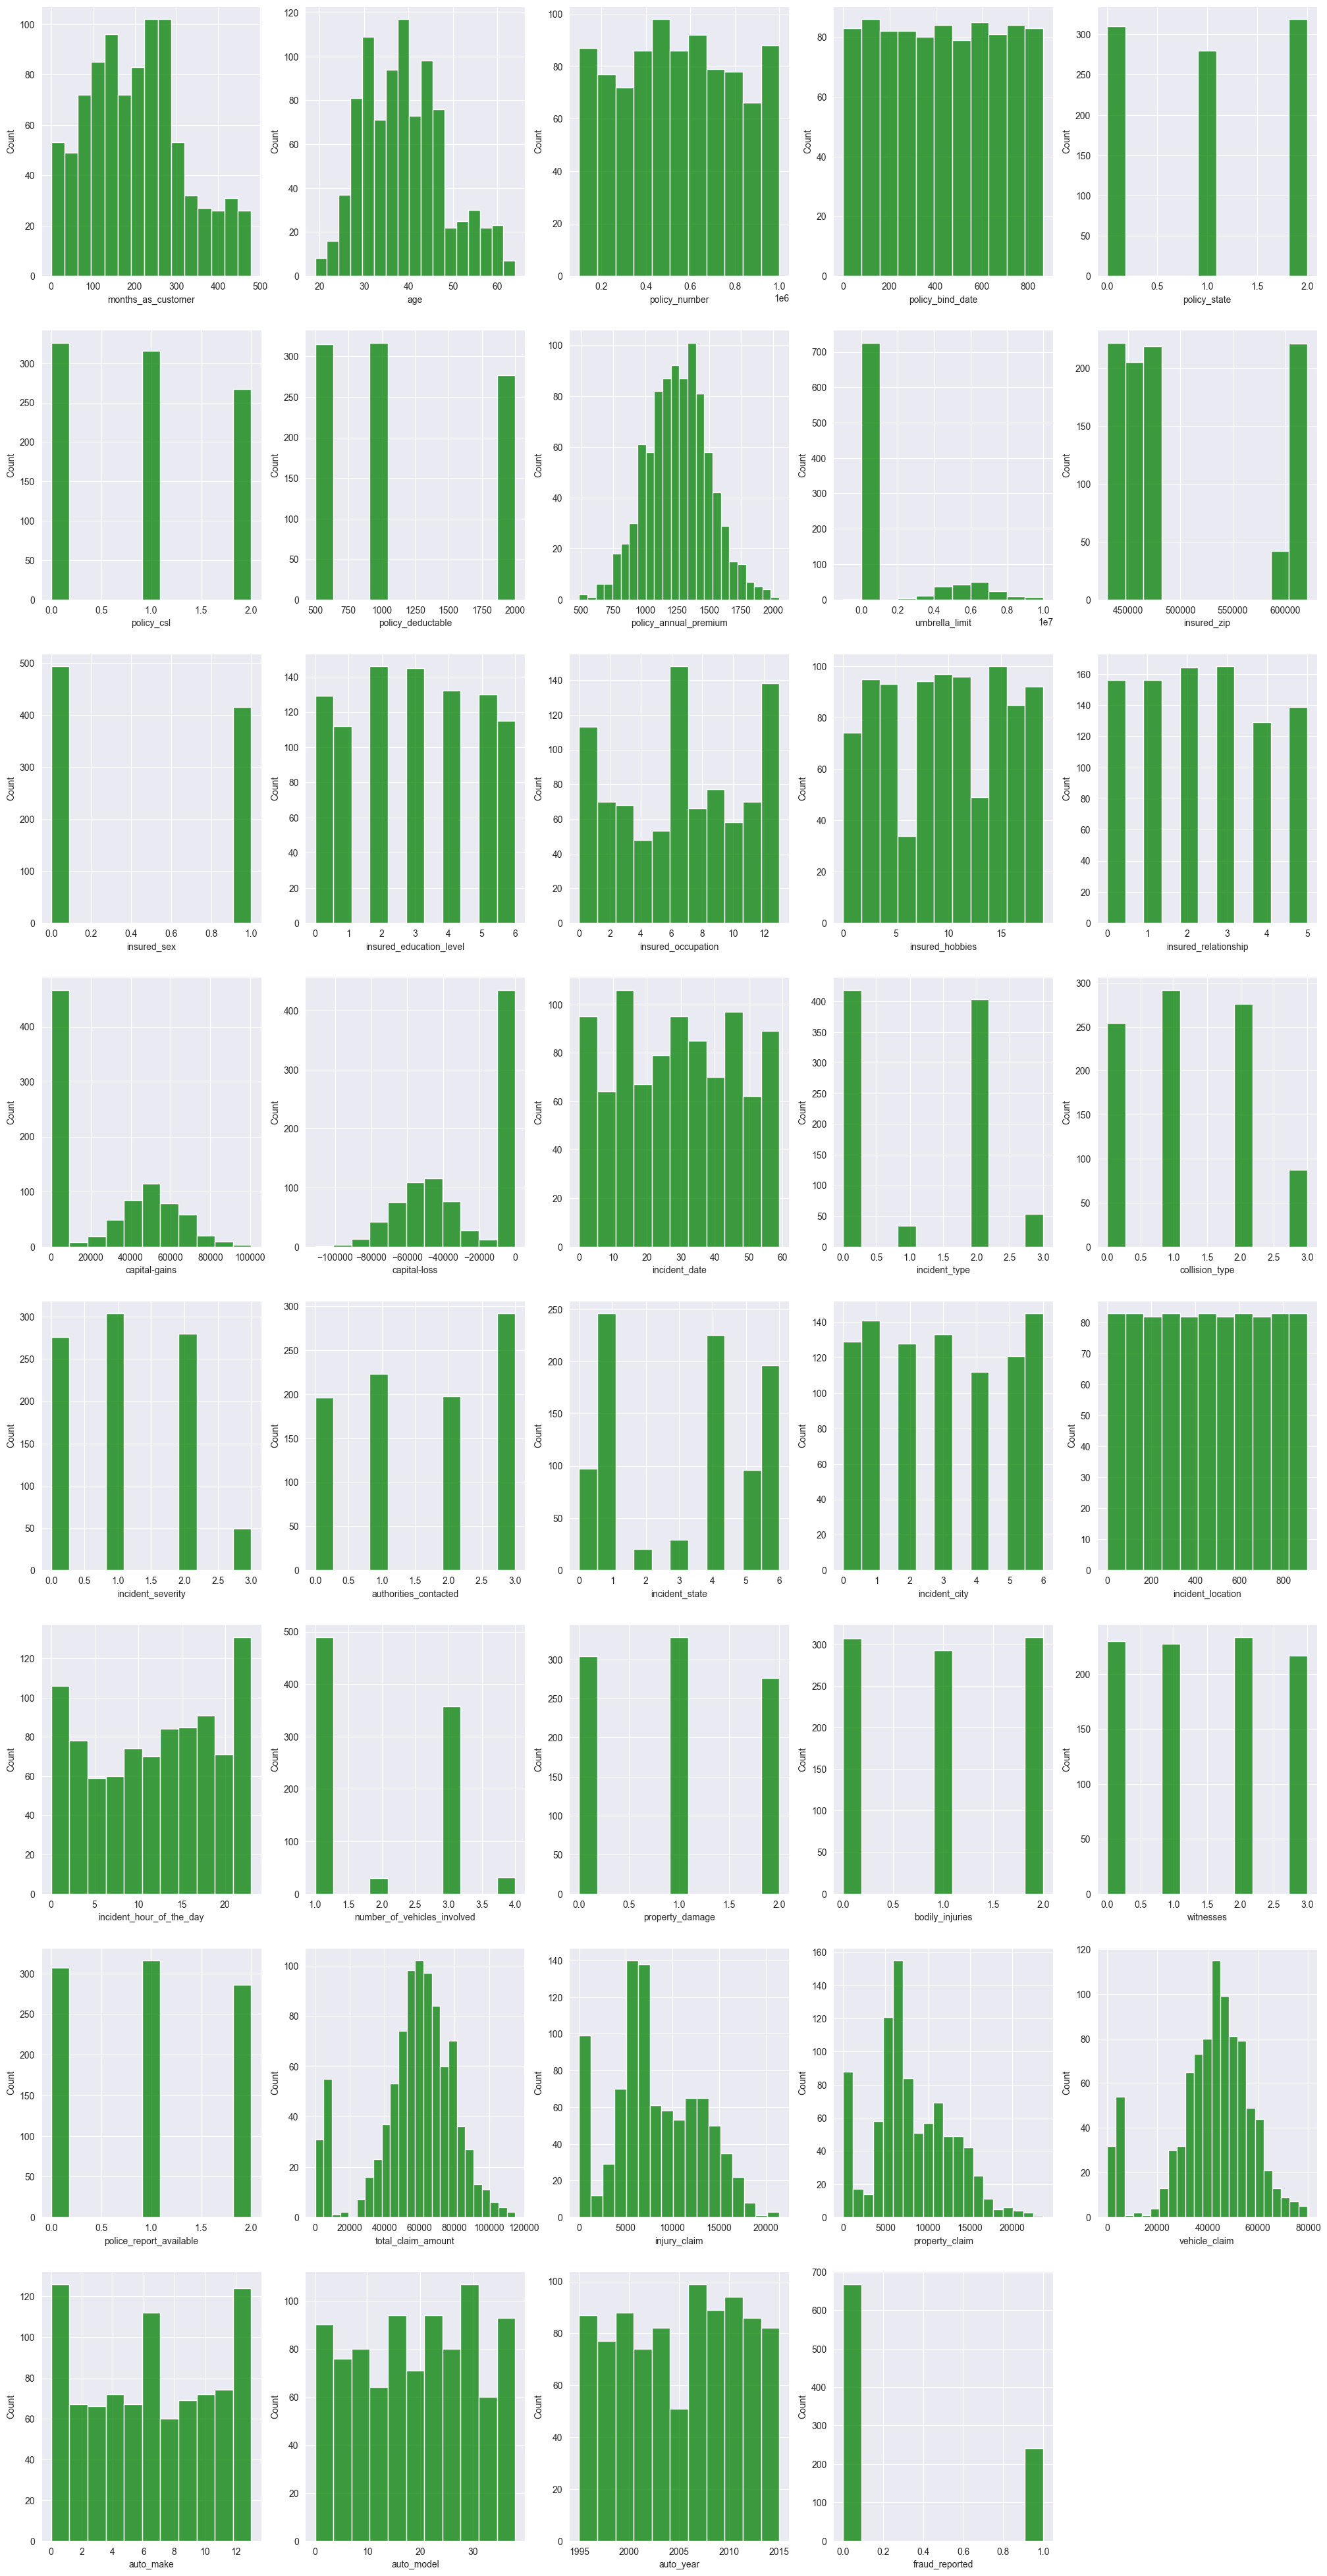

In [68]:
plt.figure(figsize=(25,50))
for col in enumerate(ICDF):
    plt.subplot(8,5,col[0]+1)
    sns.histplot(ICDF[col[1]],color='green')
plt.show()

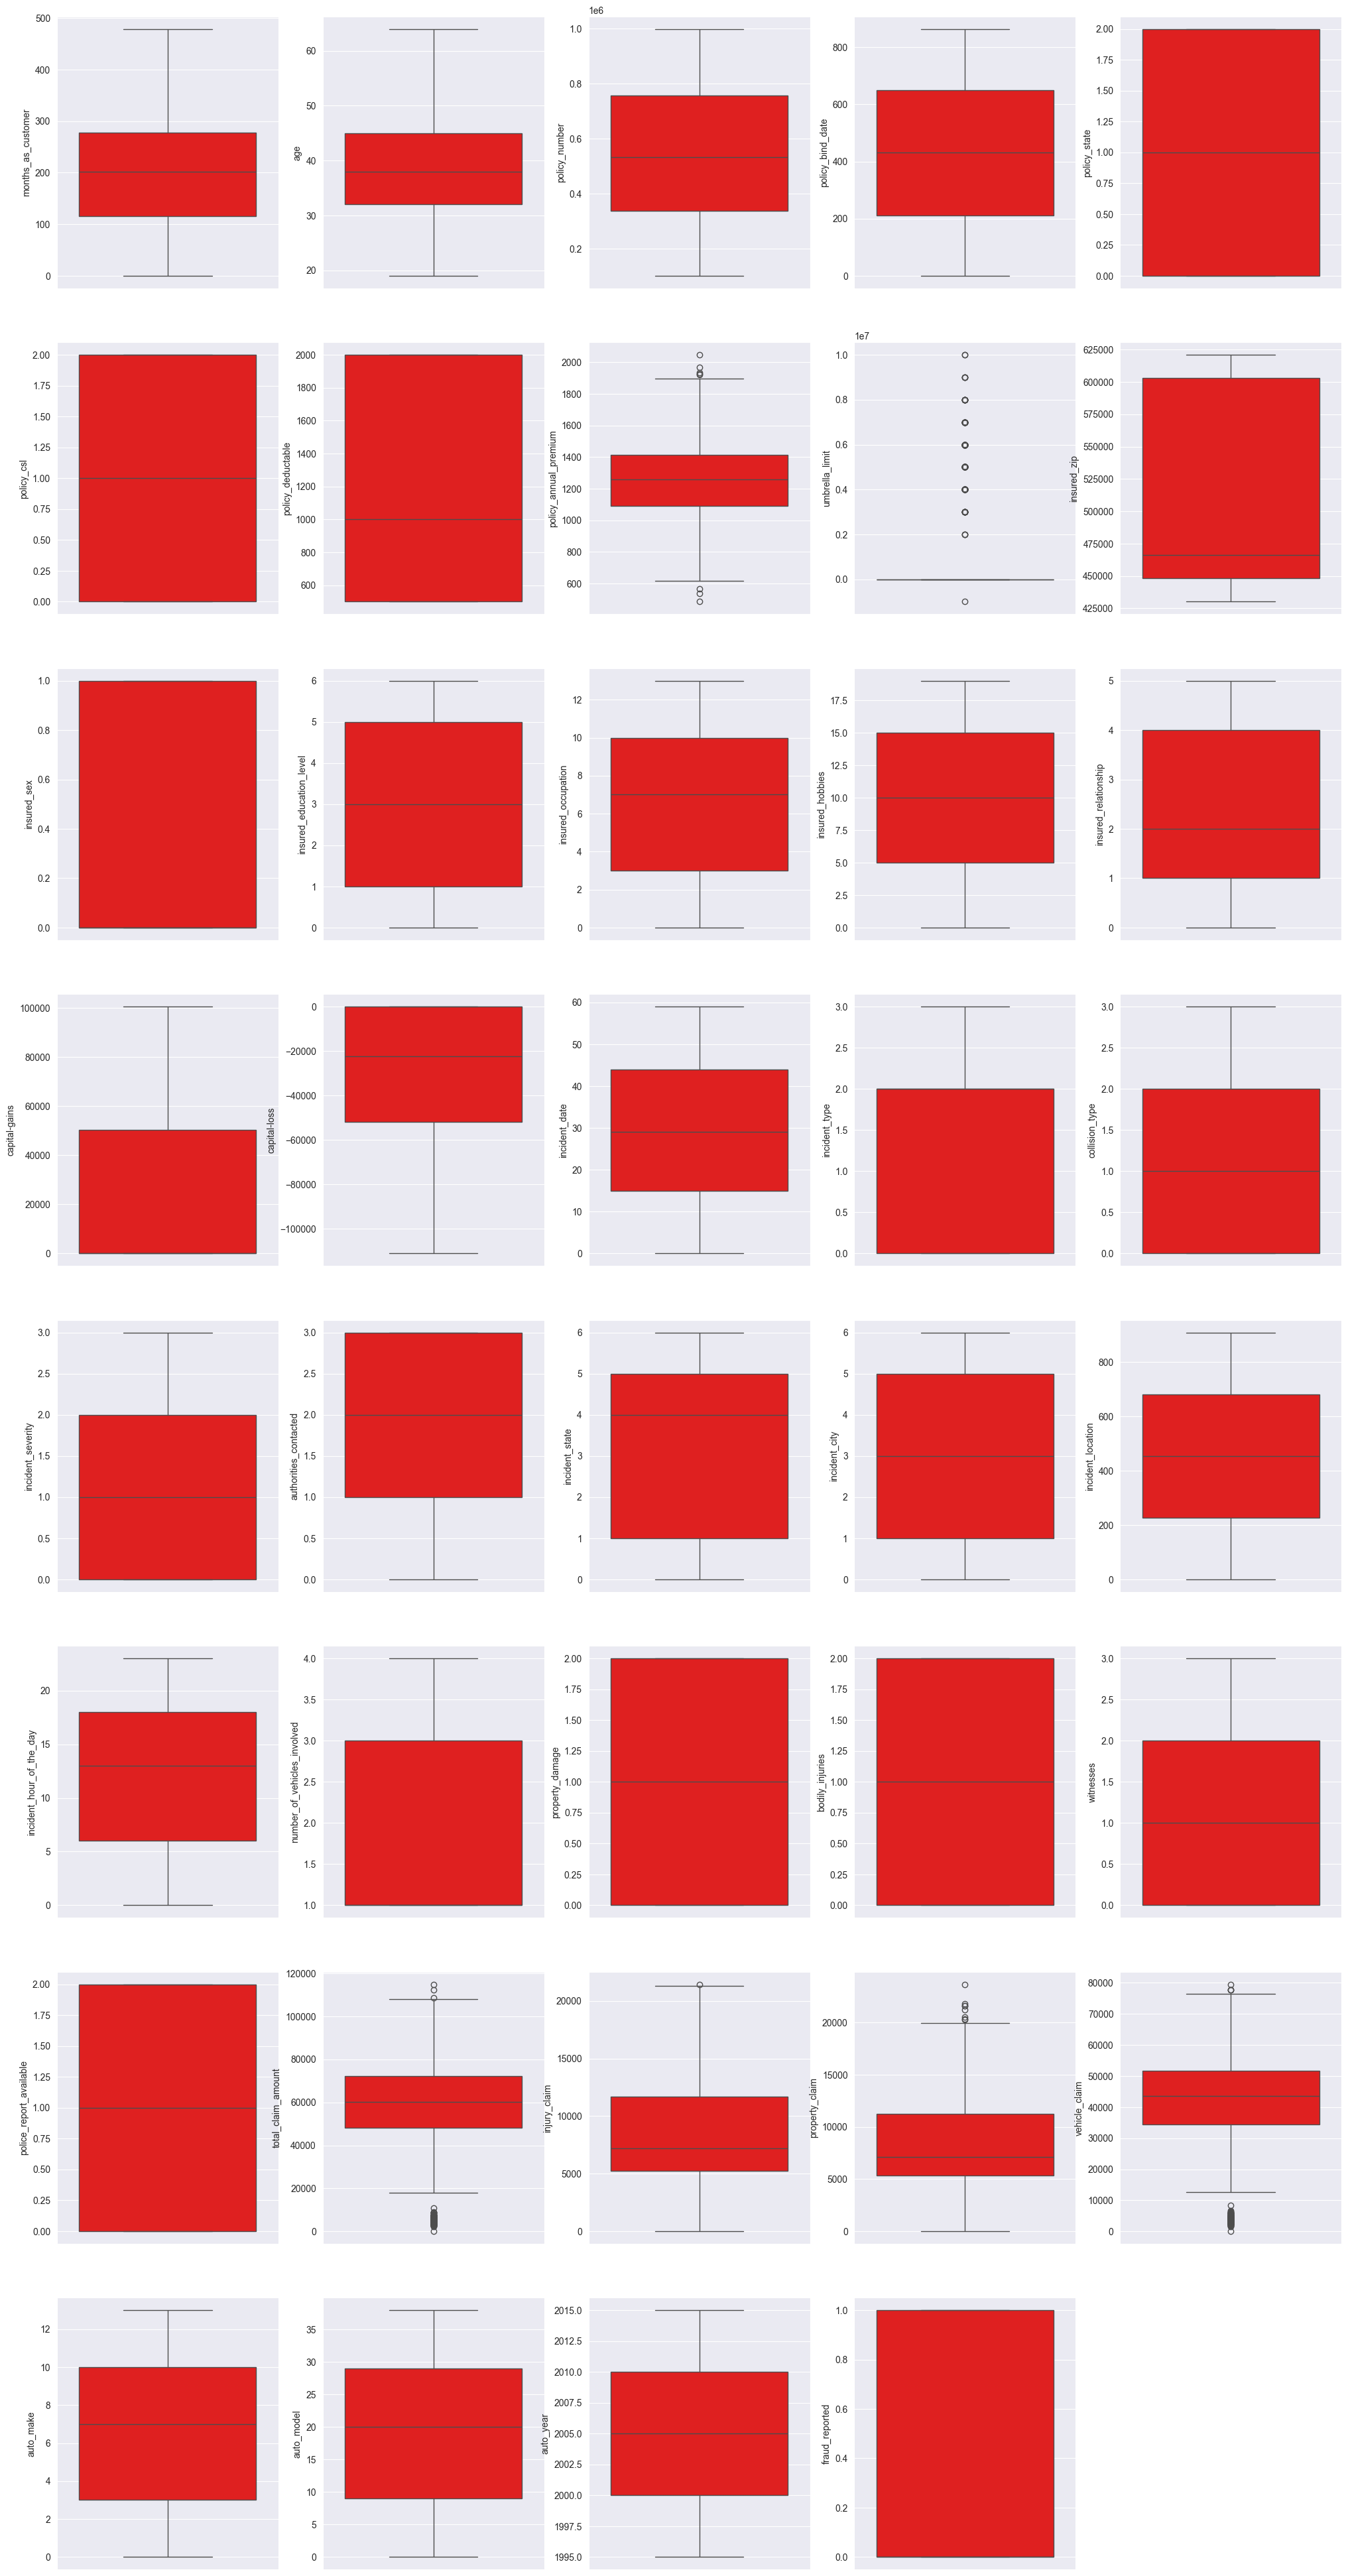

In [70]:
plt.figure(figsize=(25,50))
for col in enumerate(ICDF):
    plt.subplot(8,5,col[0]+1)
    sns.boxplot(ICDF[col[1]],color='red')
plt.show()

In [76]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(20,10))  

    Q1=ICDF[col].quantile(0.25)
    Q3=ICDF[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    ICDF[[col]]=arb.fit_transform(ICDF[[col]])
    plt.boxplot(ICDF[col])


In [74]:
out_feature=['policy_annual_premium','umbrella_limit','total_claim_amount','property_claim','vehicle_claim']

601.5549999999998
1904.1550000000002
0.0
0.0
12000.0
108160.0
-3540.0
20140.0
8405.0
77645.0


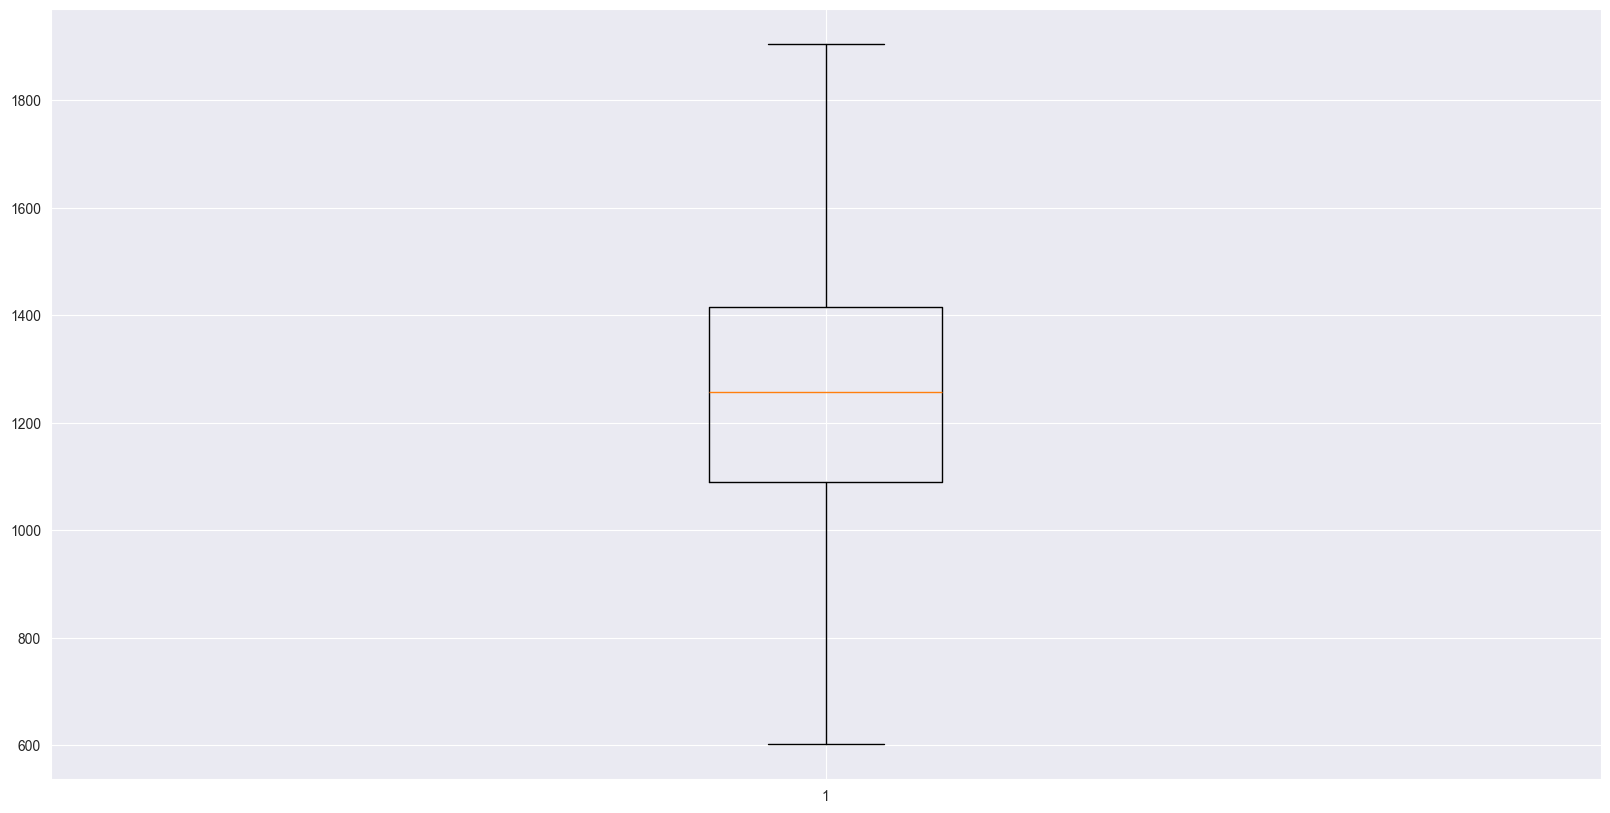

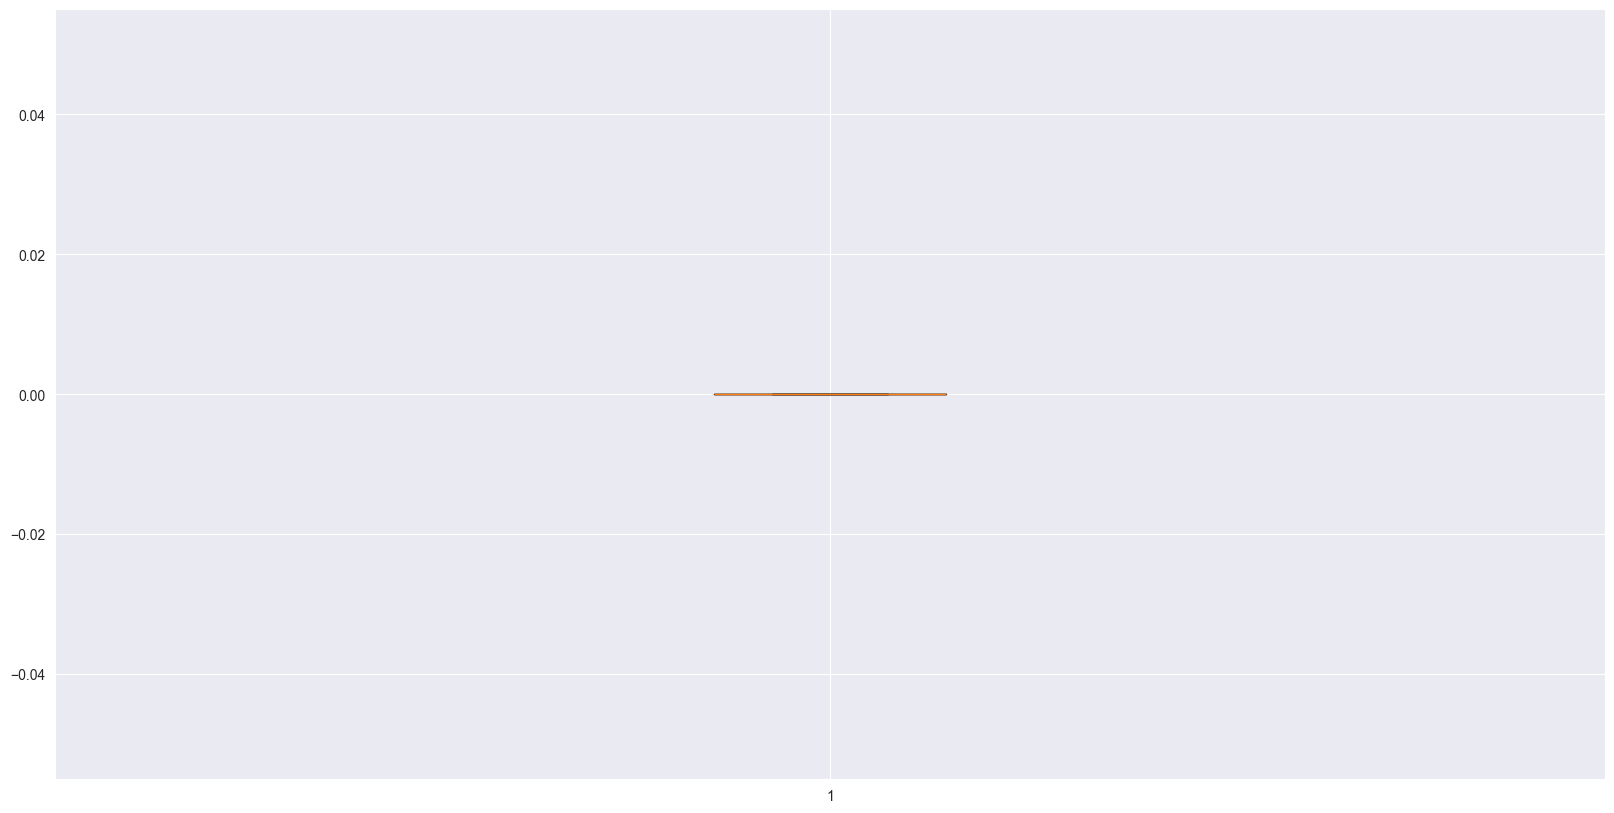

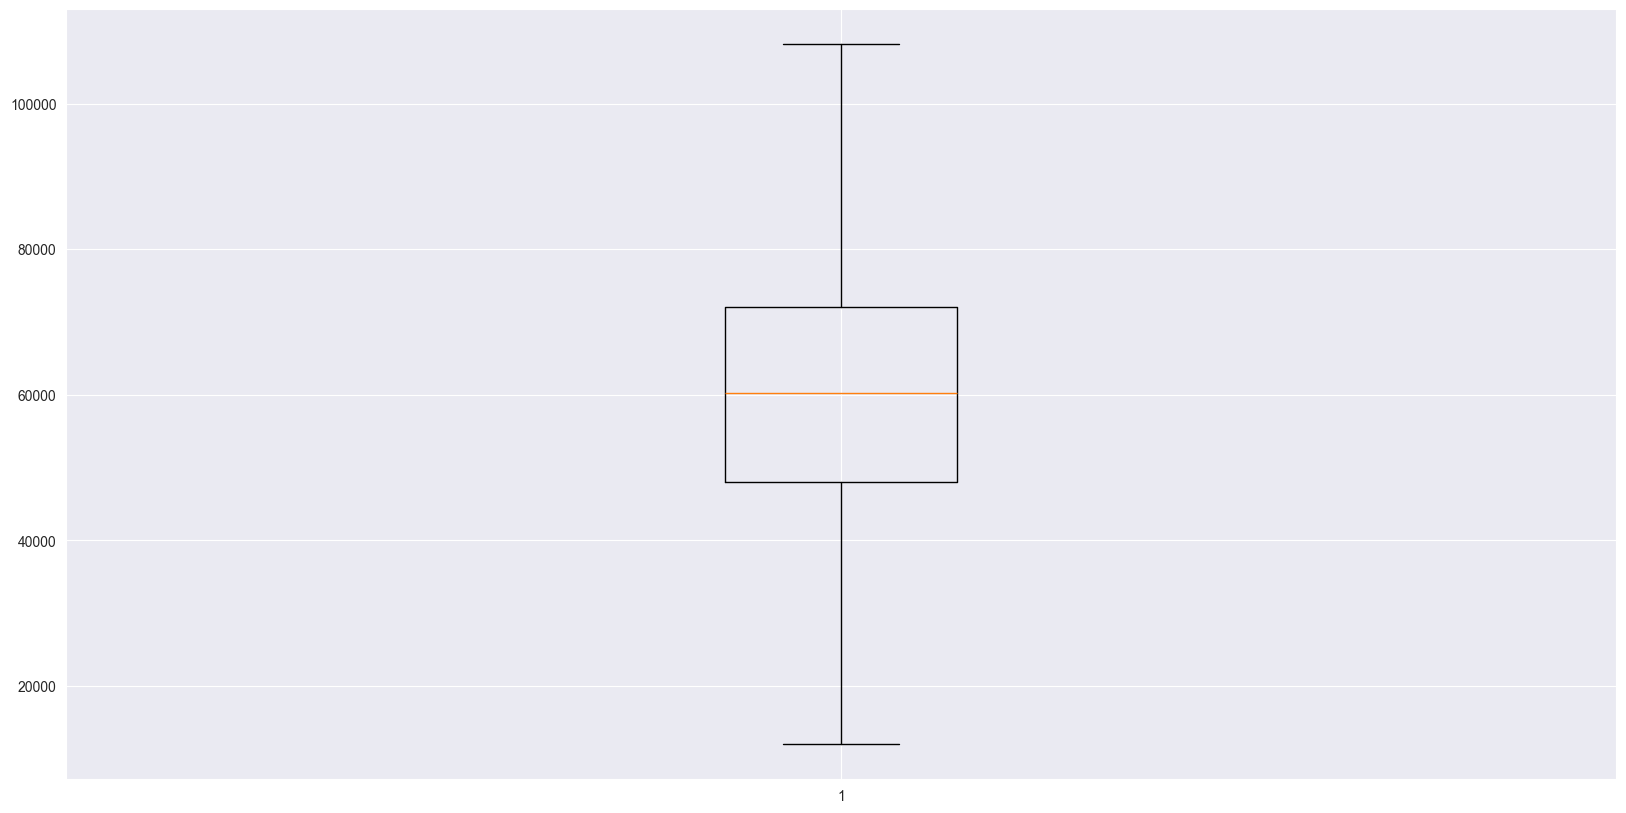

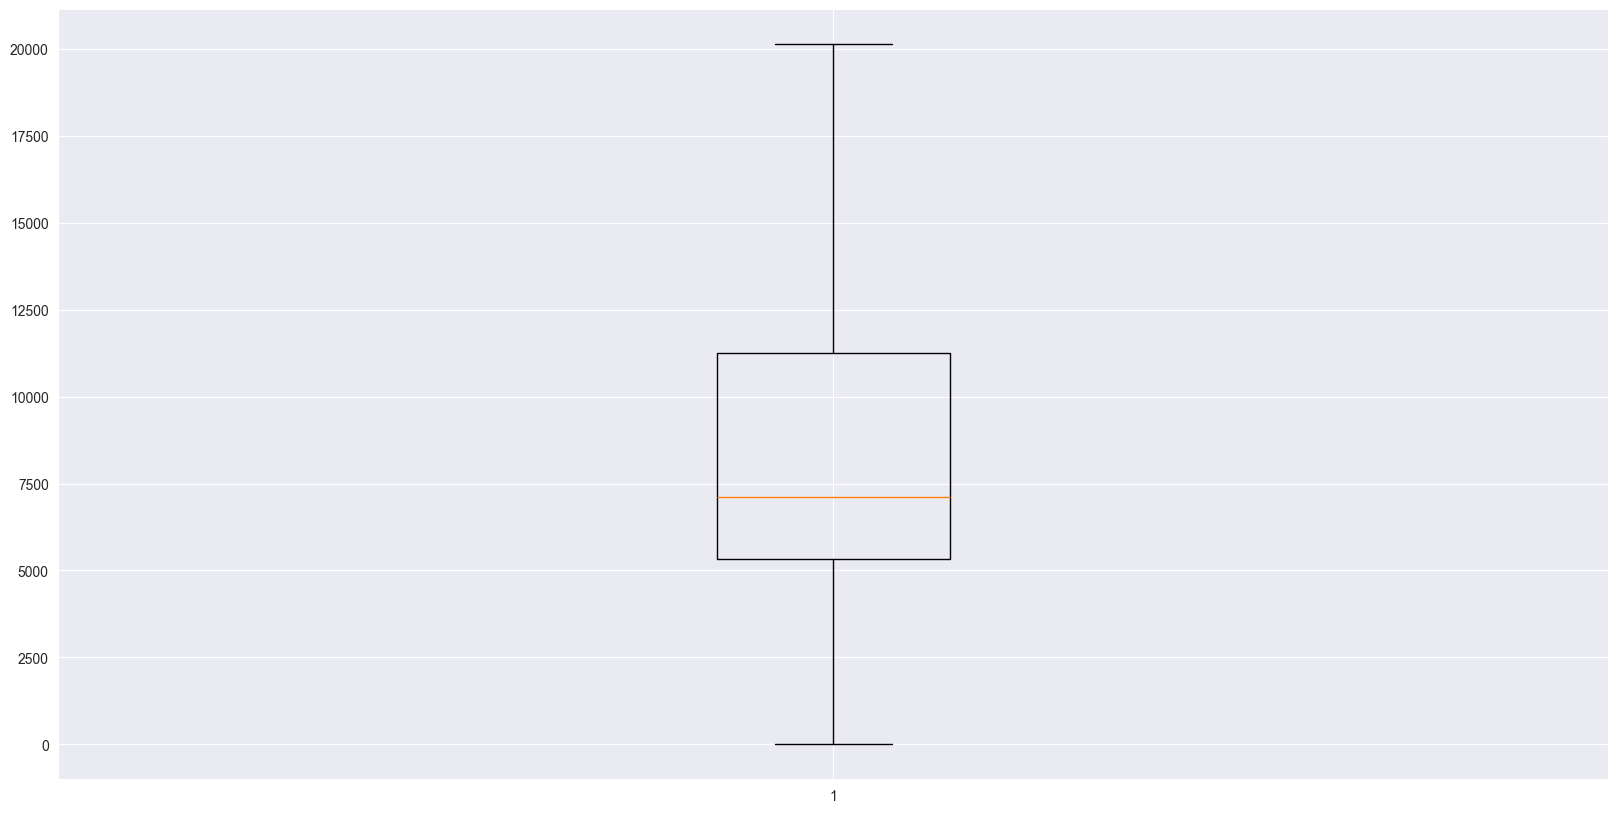

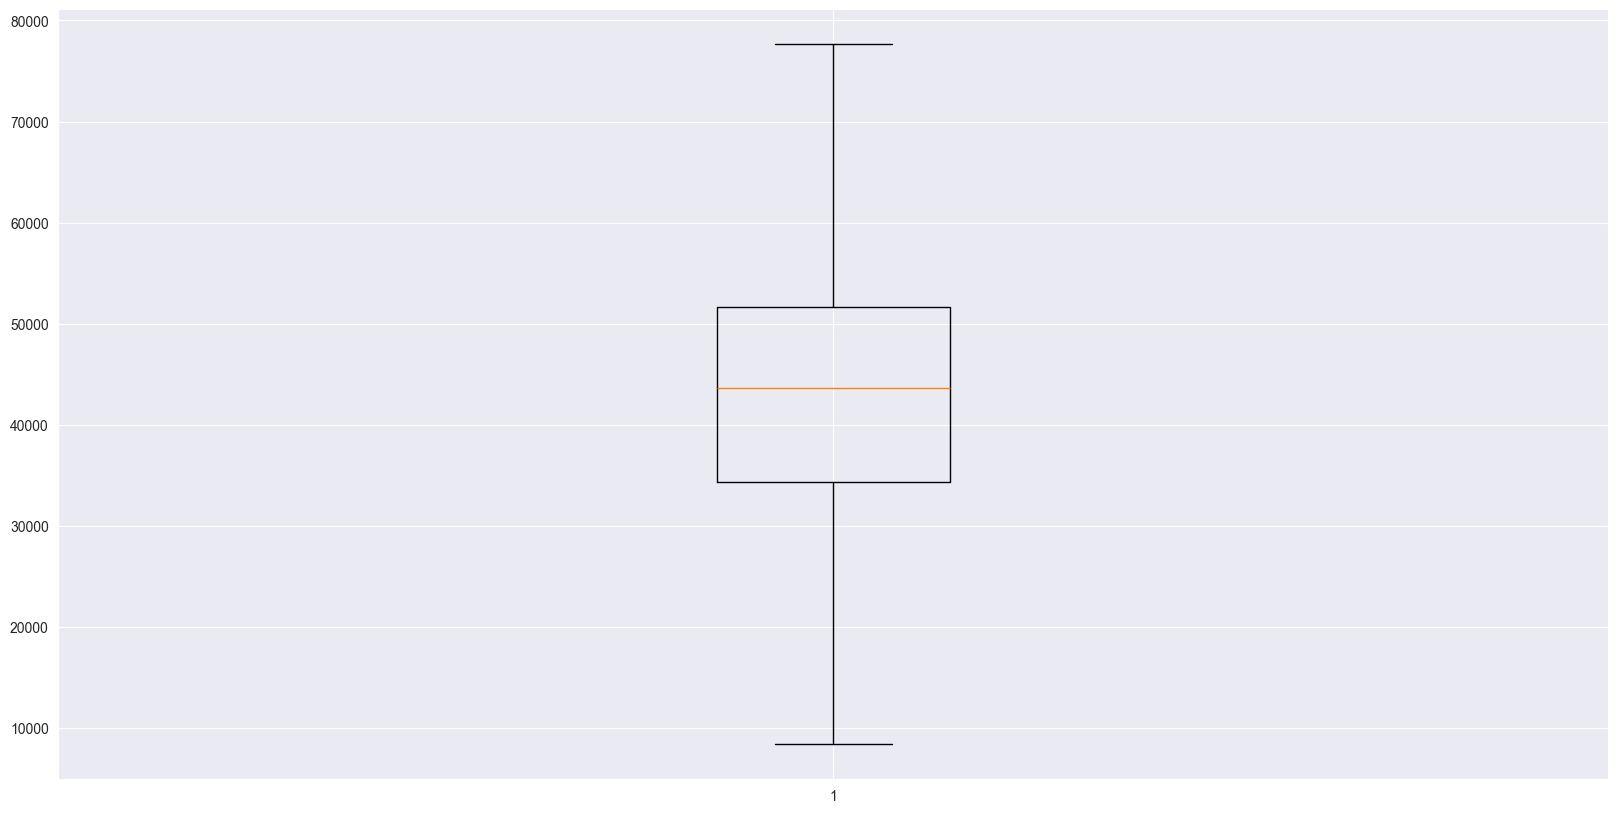

In [77]:
for col in out_feature:
    remove_outliers(col)
    

In [78]:
ICDF.skew()

months_as_customer             0.344423
age                            0.460979
policy_number                  0.030127
policy_bind_date              -0.000482
policy_state                  -0.018538
policy_csl                     0.118197
policy_deductable              0.488610
policy_annual_premium          0.032840
umbrella_limit                 0.000000
insured_zip                    0.839633
insured_sex                    0.174766
insured_education_level       -0.003115
insured_occupation            -0.063590
insured_hobbies               -0.047187
insured_relationship           0.079521
capital-gains                  0.486071
capital-loss                  -0.392918
incident_date                  0.026724
incident_type                  0.094440
collision_type                 0.210340
incident_severity              0.217916
authorities_contacted         -0.145115
incident_state                -0.125741
incident_city                  0.046627
incident_location              0.000000


In [79]:
ICDF['insured_zip']=ICDF['insured_zip'].apply(np.cbrt)

In [80]:
ICDF.skew()

months_as_customer             0.344423
age                            0.460979
policy_number                  0.030127
policy_bind_date              -0.000482
policy_state                  -0.018538
policy_csl                     0.118197
policy_deductable              0.488610
policy_annual_premium          0.032840
umbrella_limit                 0.000000
insured_zip                    0.817265
insured_sex                    0.174766
insured_education_level       -0.003115
insured_occupation            -0.063590
insured_hobbies               -0.047187
insured_relationship           0.079521
capital-gains                  0.486071
capital-loss                  -0.392918
incident_date                  0.026724
incident_type                  0.094440
collision_type                 0.210340
incident_severity              0.217916
authorities_contacted         -0.145115
incident_state                -0.125741
incident_city                  0.046627
incident_location              0.000000


In [ ]:
CONSIDER fraud_reported AS TARGET VARIABLE SPLITTING THE DATASET INTO X AND Y VARIABLE.X CONTAINS ALL THE INDEPENDENT FEATURES AND Y CONTAINS DEPENDENT FEATURE 

In [81]:
x=ICDF.drop('fraud_reported',axis=1)

In [82]:
y=ICDF.loc[:,'fraud_reported']

In [83]:
y.value_counts()

fraud_reported
0    668
1    241
Name: count, dtype: int64

In [ ]:
                                    PERFORMING FEATURE SCALING

In [88]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [89]:
x

months_as_customer       age  policy_number  policy_bind_date  \
0              0.684760  0.644444       0.468247          0.561343   
1              0.475992  0.511111       0.269370          0.862269   
2              0.279749  0.222222       0.653098          0.192130   
3              0.534447  0.488889       0.141334          0.803241   
4              0.534447  0.444444       0.004218          0.409722   
..                  ...       ...            ...               ...   
904            0.006263  0.422222       0.935920          0.516204   
905            0.594990  0.488889       0.095846          0.130787   
906            0.271399  0.333333       0.909953          0.539352   
907            0.956159  0.955556       0.481995          0.600694   
908            0.951983  0.911111       0.506633          0.381944   

     policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0             1.0         0.5           0.333333               0.618267   
1             0.5         0.5           1.000000               0.457289   
2             1.0         0.0           1.000000               0.623050   
3             0.0         0.5           1.000000               0.625046   
4             1.0         0.5           0.333333               0.575422   
..            ...         ...                ...                    ...   
904           1.0         1.0           0.333333               0.544484   
905           0.0         0.0           0.333333               0.641206   
906           1.0         0.5           0.000000               0.600288   
907           0.0         1.0           1.000000               0.579890   
908           1.0         0.5           0.333333               0.126390   

     umbrella_limit  insured_zip  ...  bodily_injuries  witnesses  \
0               0.0     0.208520  ...              0.5   0.666667   
1               0.0     0.220035  ...              0.0   0.000000   
2               0.0     0.002922  ...              1.0   1.000000   
3               0.0     0.939724  ...              0.5   0.666667   
4               0.0     0.277447  ...              0.0   0.666667   
..              ...          ...  ...              ...        ...   
904             0.0     0.006827  ...              0.0   0.333333   
905             0.0     0.940008  ...              1.0   1.000000   
906             0.0     0.074606  ...              1.0   1.000000   
907             0.0     0.068278  ...              0.0   0.333333   
908             0.0     0.959258  ...              0.0   1.000000   

     police_report_available  total_claim_amount  injury_claim  \
0                        1.0            0.619904      0.303497   
1                        0.5            0.000000      0.036364   
2                        0.0            0.235545      0.358974   
3                        0.0            0.534526      0.295571   
4                        0.0            0.541805      0.298834   
..                       ...                 ...           ...   
904                      0.5            0.782030      0.813054   
905                      0.5            1.000000      0.842890   
906                      1.0            0.577163      0.349650   
907                      1.0            0.363769      0.243357   
908                      0.5            0.000000      0.021445   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0          0.646475       0.630777   0.769231    0.026316       0.45  
1          0.038729       0.000000   0.615385    0.315789       0.60  
2          0.191162       0.212233   0.307692    0.789474       0.60  
3          0.314796       0.611135   0.230769    0.894737       0.95  
4          0.318272       0.619223   0.769231    0.078947       0.40  
..              ...            ...        ...         ...        ...  
904        0.432969       0.760182   0.461538    0.157895       0.55  
905        0.897716       0.923094   1.000000    0.736842       1.00  
90

In [90]:
y

0      1
1      1
2      0
3      1
5      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 909, dtype: int32

In [91]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)



In [92]:
y1.value_counts()

fraud_reported
1    668
0    668
Name: count, dtype: int64

In [ ]:
# now each category of target feature has balanced data 

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

vif values                     features
0      32.105976           months_as_customer
1      44.669270                          age
2       4.371503                policy_number
3       4.534868             policy_bind_date
4       2.756418                 policy_state
5       2.485825                   policy_csl
6       2.192703            policy_deductable
7       9.029938        policy_annual_premium
8            NaN               umbrella_limit
9       2.206407                  insured_zip
10      2.019884                  insured_sex
11      3.754046      insured_education_level
12      4.034621           insured_occupation
13      4.417253              insured_hobbies
14      3.520546         insured_relationship
15      1.983913                capital-gains
16     10.881710                 capital-loss
17      4.191004                incident_date
18     14.448353                incident_type
19      3.767871               collision_type
20      2.261429            incident_severity
21      3.731752        authorities_contacted
22      3.689208               incident_state
23      3.520598                incident_city
24      4.481041            incident_location
25      4.626971     incident_hour_of_the_day
26     12.182836  number_of_vehicles_involved
27      2.789915              property_damage
28      2.759604              bodily_injuries
29      3.167423                    witnesses
30      2.815366      police_report_available
31  10523.978606           total_claim_amount
32    340.694021                 injury_claim
33    350.253294               property_claim
34   5277.391807                vehicle_claim
35      4.161121                    auto_make
36      4.623791                   auto_model
37      4.342998                    auto_year

In [95]:
x1.drop('total_claim_amount',axis=1,inplace=True)

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

vif values                     features
0    32.095590           months_as_customer
1    44.528741                          age
2     4.367034                policy_number
3     4.495362             policy_bind_date
4     2.717597                 policy_state
5     2.484857                   policy_csl
6     2.189404            policy_deductable
7     8.843066        policy_annual_premium
8          NaN               umbrella_limit
9     2.205698                  insured_zip
10    2.017997                  insured_sex
11    3.745549      insured_education_level
12    4.009087           insured_occupation
13    4.389044              insured_hobbies
14    3.481104         insured_relationship
15    1.983874                capital-gains
16   10.217995                 capital-loss
17    4.160764                incident_date
18   13.884974                incident_type
19    3.633310               collision_type
20    2.259452            incident_severity
21    3.707379        authorities_contacted
22    3.684272               incident_state
23    3.502101                incident_city
24    4.467591            incident_location
25    4.528796     incident_hour_of_the_day
26   11.213896  number_of_vehicles_involved
27    2.775004              property_damage
28    2.759480              bodily_injuries
29    3.153702                    witnesses
30    2.798504      police_report_available
31    7.481513                 injury_claim
32    8.453831               property_claim
33   16.018481                vehicle_claim
34    4.122617                    auto_make
35    4.561310                   auto_model
36    4.289091                    auto_year

In [97]:
ICDF['umbrella_limit'].var()

0.0

In [98]:
x1.drop('umbrella_limit',axis=1,inplace=True)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [100]:
maxac=0
maxRs=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 0.9077306733167082 at random state 120


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRs)
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is',acc)

Accuracy is 0.8653366583541147


In [102]:
def classification_models(model,x_train,y_train,x_test,y_test):
     
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(15,10))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')



0.8703241895261845
[[167  30]
 [ 22 182]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       197
           1       0.86      0.89      0.88       204

    accuracy                           0.87       401
   macro avg       0.87      0.87      0.87       401
weighted avg       0.87      0.87      0.87       401



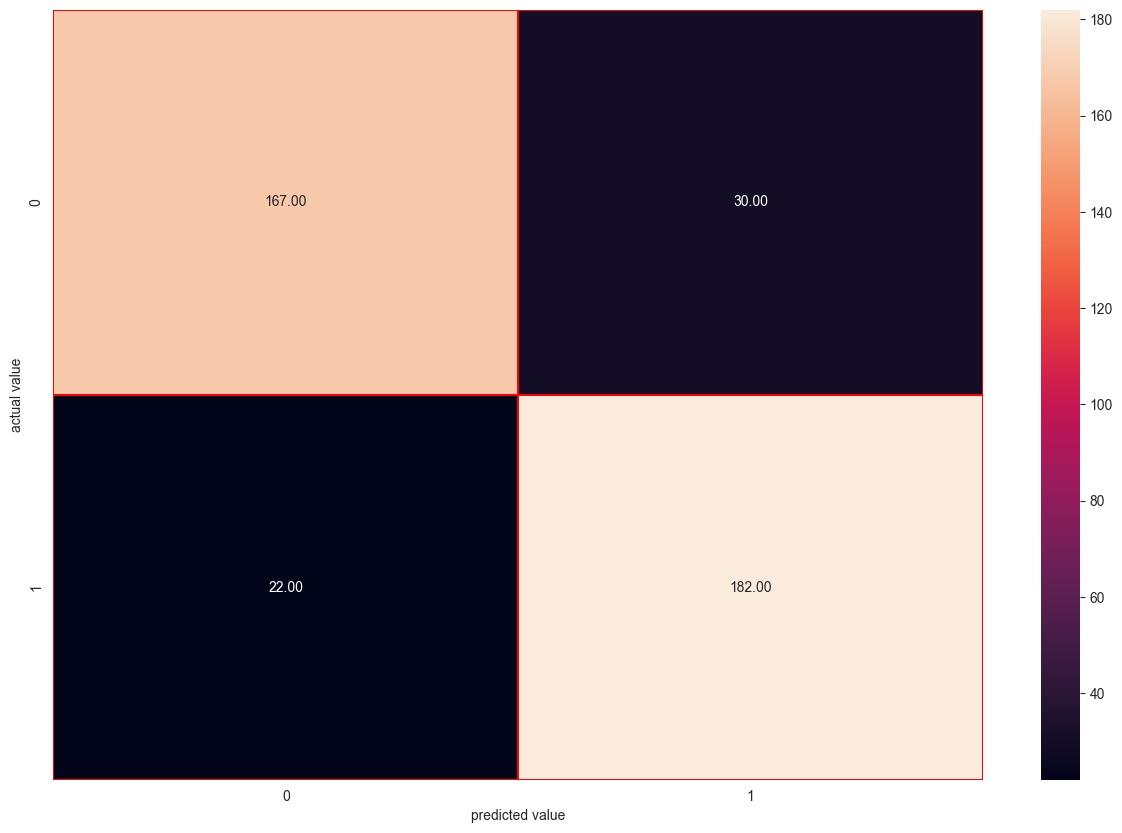

In [103]:
RFC=RandomForestClassifier()

classification_models(RFC,x_train,y_train,x_test,y_test)

0.7182044887780549
[[137  60]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       197
           1       0.72      0.74      0.73       204

    accuracy                           0.72       401
   macro avg       0.72      0.72      0.72       401
weighted avg       0.72      0.72      0.72       401



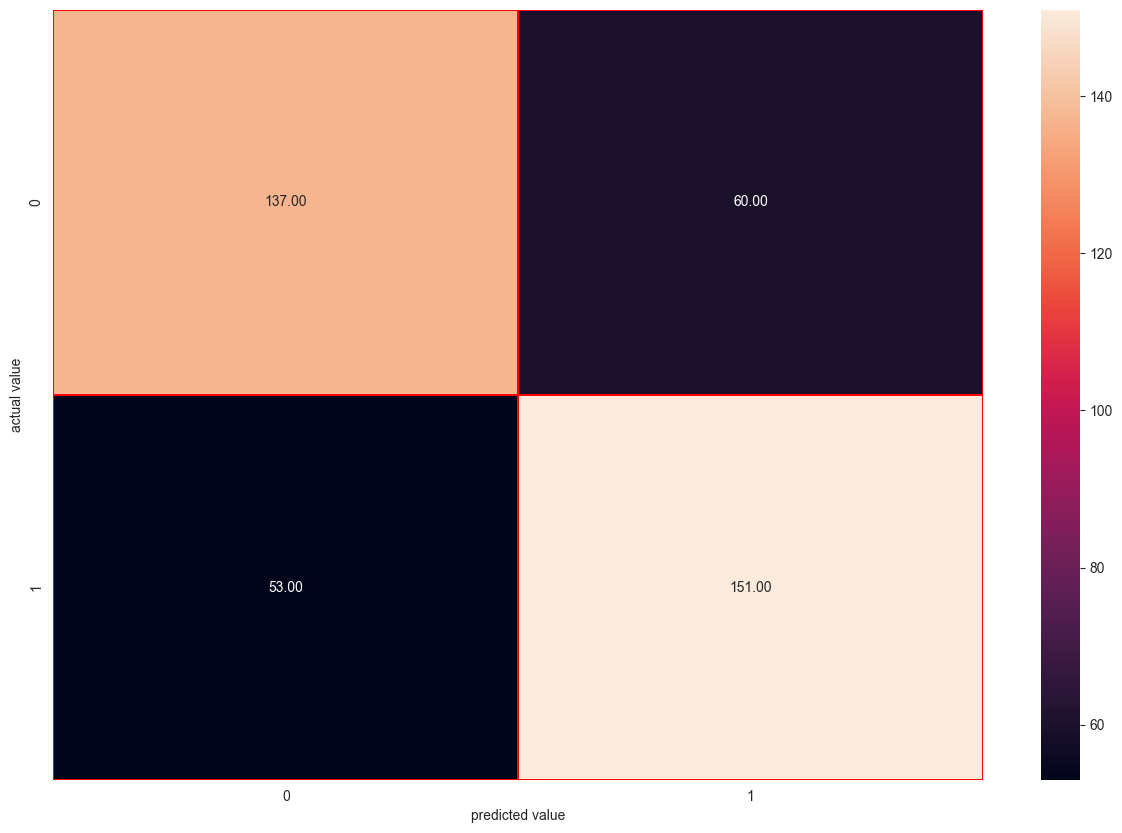

In [104]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.8379052369077307
[[163  34]
 [ 31 173]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       197
           1       0.84      0.85      0.84       204

    accuracy                           0.84       401
   macro avg       0.84      0.84      0.84       401
weighted avg       0.84      0.84      0.84       401



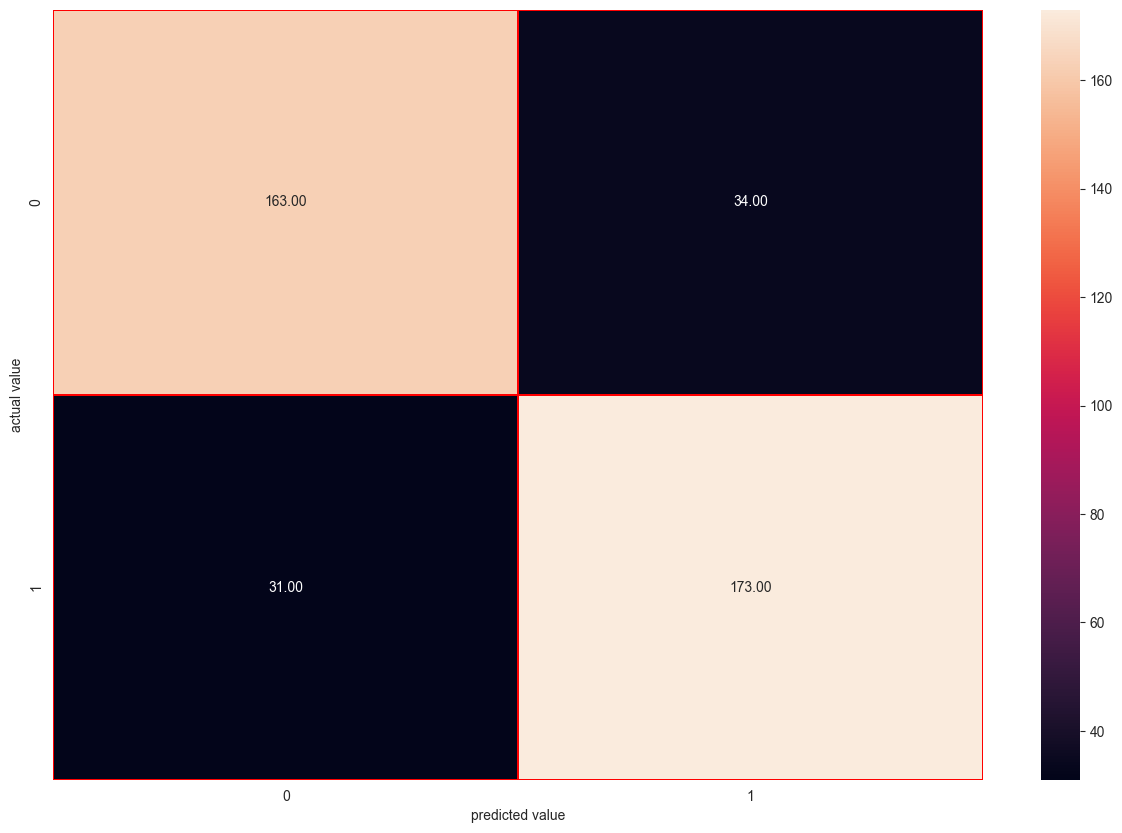

In [106]:
svc=SVC(kernel='rbf')
classification_models(svc,x_train,y_train,x_test ,y_test)


0.8778054862842892
[[167  30]
 [ 19 185]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       197
           1       0.86      0.91      0.88       204

    accuracy                           0.88       401
   macro avg       0.88      0.88      0.88       401
weighted avg       0.88      0.88      0.88       401



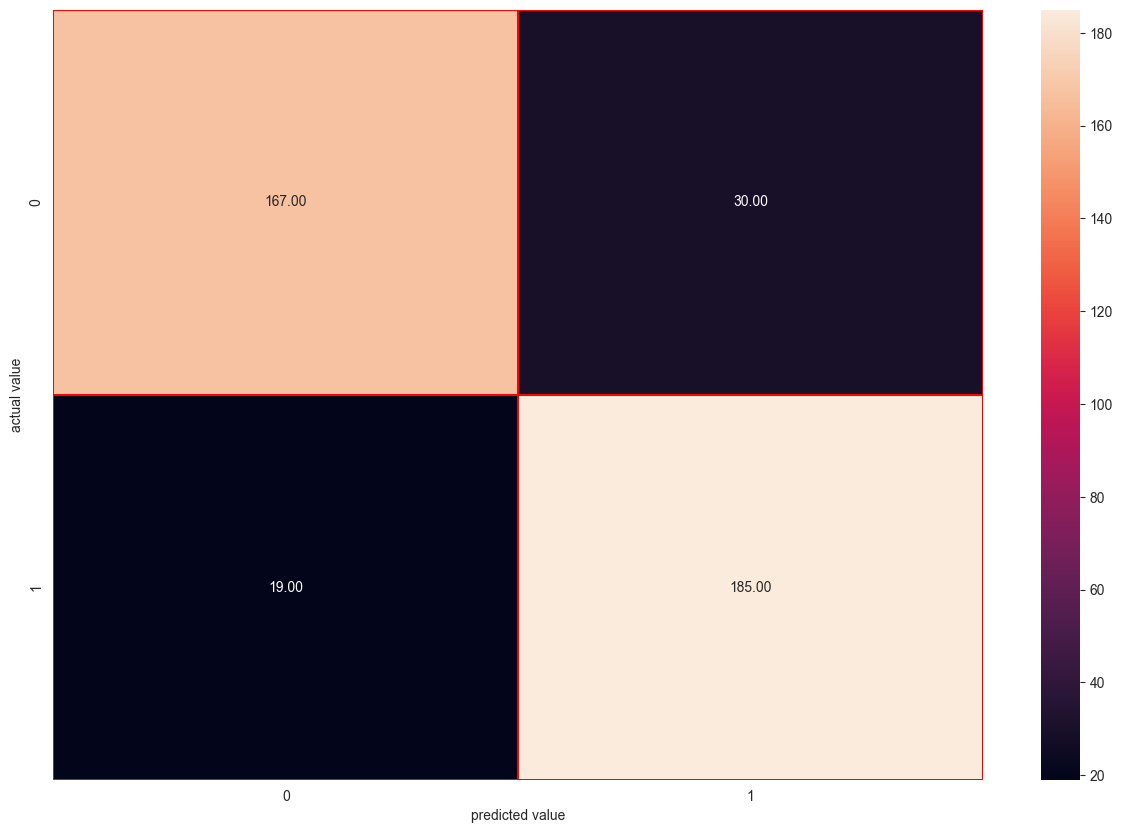

In [107]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)


0.8778054862842892
[[164  33]
 [ 16 188]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       197
           1       0.85      0.92      0.88       204

    accuracy                           0.88       401
   macro avg       0.88      0.88      0.88       401
weighted avg       0.88      0.88      0.88       401



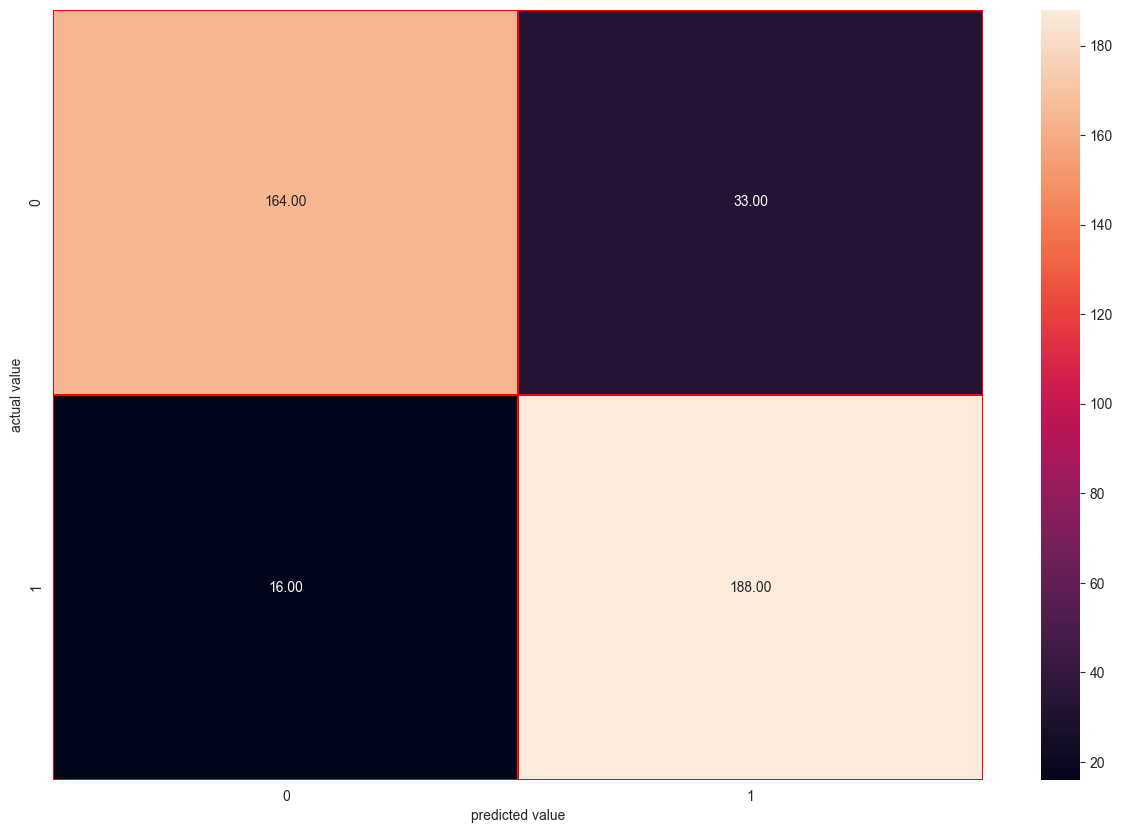

In [108]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.85785536159601
[[164  33]
 [ 24 180]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       197
           1       0.85      0.88      0.86       204

    accuracy                           0.86       401
   macro avg       0.86      0.86      0.86       401
weighted avg       0.86      0.86      0.86       401



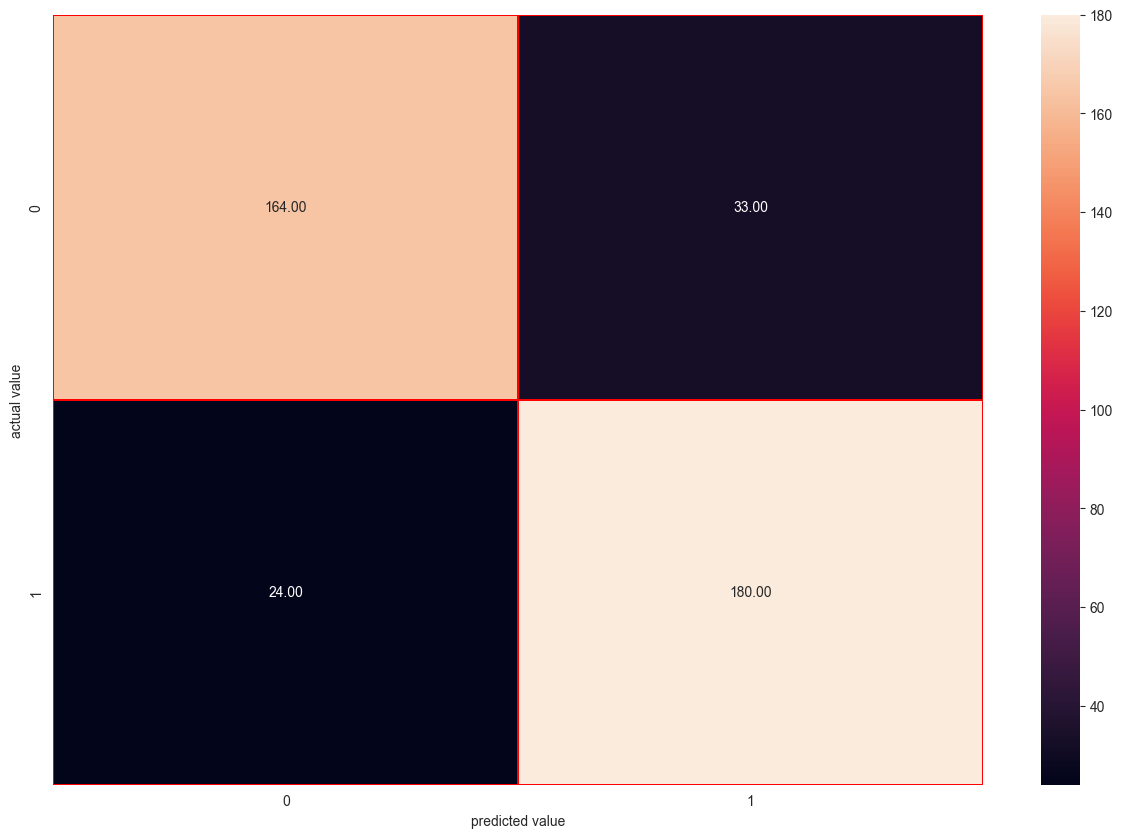

In [109]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

0.8528678304239401
[[162  35]
 [ 24 180]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       197
           1       0.84      0.88      0.86       204

    accuracy                           0.85       401
   macro avg       0.85      0.85      0.85       401
weighted avg       0.85      0.85      0.85       401



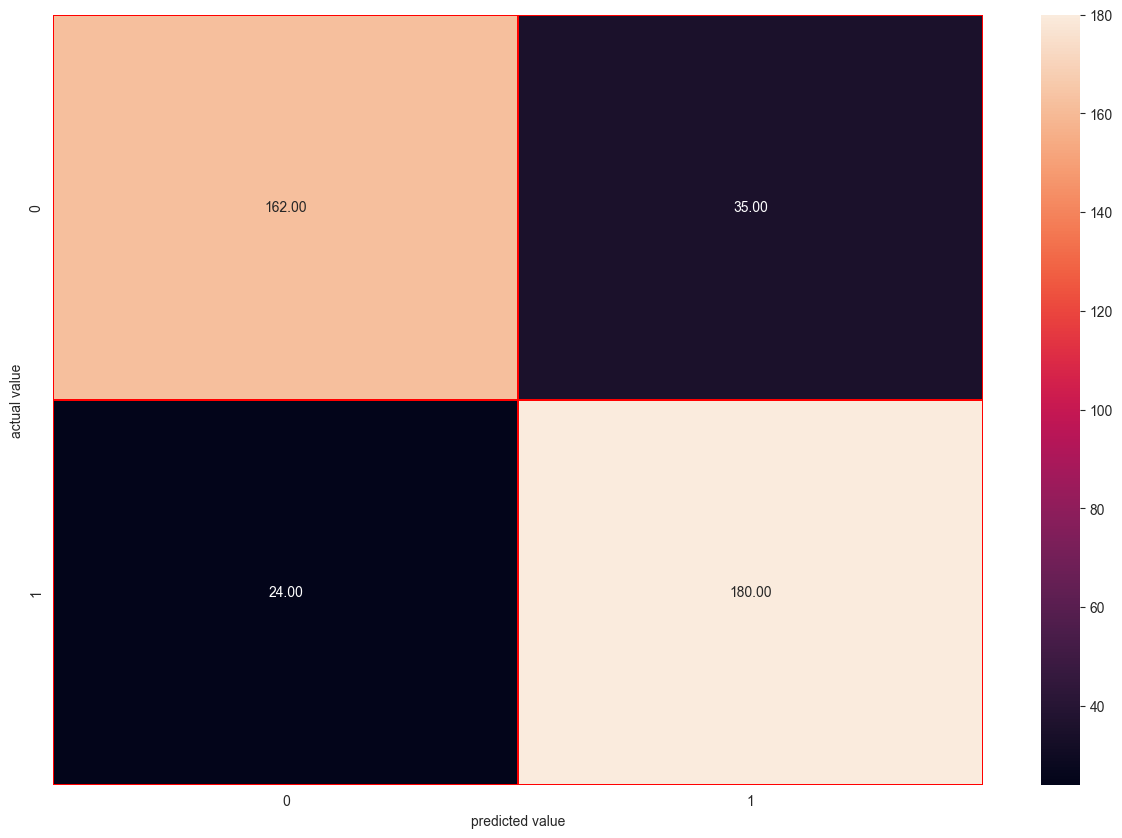

In [110]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

                            CHECKING FOR CROSS VALIDATION SCORES OF THE MODEL

In [111]:
def cross_validation(model,x1,y1,x_test):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [112]:
models=[LR,RFC,etc,gbc,bgc,svc,dtc,bgc]

In [113]:
for model in models:
    print('for cross validation of {}'.format(model))
    
    cross_validation(model,x1,y1,x_test)
    print('#'*50)

for cross validation of LogisticRegression()
[0.7238806  0.72659176 0.76029963 0.76404494 0.76029963]
0.747023310414221
differnce between accuracy score and cross validation is -0.028818821636166114
##################################################
for cross validation of RandomForestClassifier()
[0.73880597 0.78651685 0.92509363 0.93632959 0.92883895]
0.8631169992732964
differnce between accuracy score and cross validation is 0.007207190252888074
##################################################
for cross validation of ExtraTreesClassifier()
[0.84701493 0.82771536 0.92883895 0.94382022 0.94756554]
0.8989910000559004
differnce between accuracy score and cross validation is -0.021185513771611153
##################################################
for cross validation of GradientBoostingClassifier()
[0.77238806 0.80898876 0.8988764  0.91385768 0.91011236]
0.8608446531388004
differnce between accuracy score and cross validation is 0.016960833145488796
####################################

            HYPER-PARAMETER TUNNING FOR RANDOMFORESTCLASSIFIER MODEL

In [114]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

In [117]:
from sklearn.model_selection import GridSearchCV
RFC=RandomForestClassifier()
grid_search=GridSearchCV(RFC,param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [118]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}

In [122]:
final_model=RandomForestClassifier(max_depth=15,min_samples_split=5,n_estimators=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
score=cross_val_score(final_model,x1,y1,cv=5)
print(score)
print(score.mean()*100)
print('difference between r2 score and cross validation score is ',(acc-score.mean())*100)


0.8753117206982544
[0.75746269 0.78277154 0.90636704 0.92883895 0.92883895]
86.08558331935828
difference between r2 score and cross validation score is  1.4455887504671638


                PLOTTING AUC ROC CURVE FOR MY FINAL MODEL

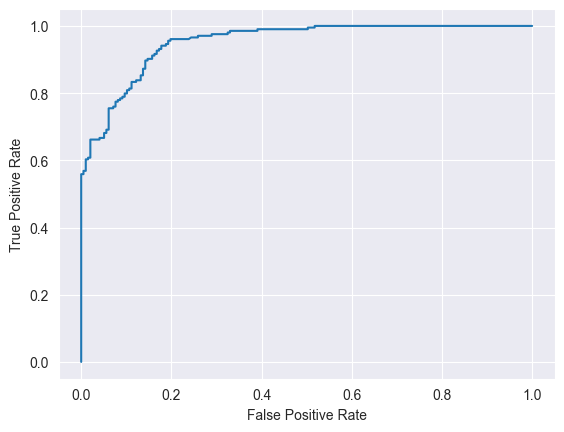

In [124]:
from sklearn import metrics
y_pred_proba = final_model.predict_proba(x_test)[:,1]
fpr, tpr,_= metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
